In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric
from sklearn.svm import SVC

# Importing The File

In [ ]:
dp= pd.read_csv("trip_package.csv")
dp



In [5]:

a = dp.select_dtypes(include='number').columns.to_list()
a

['CustomerID',
 'BackageTaken',
 'Age',
 'CityTier',
 'DurationOfDiscussion',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPackageStar',
 'NumberOfTrips',
 'Passport',
 'CustomerSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

 # The Initial Analysis Of Data

# The number of missing values

In [4]:
dp.isnull().sum().sort_values(ascending=False)

DurationOfDiscussion         251
MonthlyIncome                233
Age                          226
NumberOfTrips                140
NumberOfChildrenVisiting      66
NumberOfFollowups             45
PreferredPackageStar          26
TypeofContact                 25
Designation                    0
OwnCar                         0
CustomerSatisfactionScore      0
Passport                       0
CustomerID                     0
MaritalStatus                  0
BackageTaken                   0
NumberOfPersonVisiting         0
Gender                         0
Occupation                     0
CityTier                       0
PackageEnquired                0
dtype: int64

# Percentage of missing values

In [5]:
print(round(dp.isna().sum() / dp.isna().count() * 100, 2).sort_values(ascending=False))

DurationOfDiscussion         5.14
MonthlyIncome                4.77
Age                          4.62
NumberOfTrips                2.86
NumberOfChildrenVisiting     1.35
NumberOfFollowups            0.92
PreferredPackageStar         0.53
TypeofContact                0.51
Designation                  0.00
OwnCar                       0.00
CustomerSatisfactionScore    0.00
Passport                     0.00
CustomerID                   0.00
MaritalStatus                0.00
BackageTaken                 0.00
NumberOfPersonVisiting       0.00
Gender                       0.00
Occupation                   0.00
CityTier                     0.00
PackageEnquired              0.00
dtype: float64


In [6]:
dp["Gender"].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

# Statically refernce of all coloums

In [7]:
dp.describe()

,CustomerID,BackageTaken,Age,CityTier,DurationOfDiscussion,NumberOfPersonVisiting,NumberOfFollowups,PreferredPackageStar,NumberOfTrips,Passport,CustomerSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


# Categorical and numerical value

In [8]:
dp.dtypes.value_counts()

int64      7
float64    7
object     6
dtype: int64

# Analysis of All Coloums

# Univariable Analysis

In [9]:
dp.isnull().sum().sort_values(ascending=False)

DurationOfDiscussion         251
MonthlyIncome                233
Age                          226
NumberOfTrips                140
NumberOfChildrenVisiting      66
NumberOfFollowups             45
PreferredPackageStar          26
TypeofContact                 25
Designation                    0
OwnCar                         0
CustomerSatisfactionScore      0
Passport                       0
CustomerID                     0
MaritalStatus                  0
BackageTaken                   0
NumberOfPersonVisiting         0
Gender                         0
Occupation                     0
CityTier                       0
PackageEnquired                0
dtype: int64

In [10]:
dp.describe()

,CustomerID,BackageTaken,Age,CityTier,DurationOfDiscussion,NumberOfPersonVisiting,NumberOfFollowups,PreferredPackageStar,NumberOfTrips,Passport,CustomerSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [11]:
dp.head()

,CustomerID,BackageTaken,Age,TypeofContact,CityTier,DurationOfDiscussion,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,PackageEnquired,PreferredPackageStar,MaritalStatus,NumberOfTrips,Passport,CustomerSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


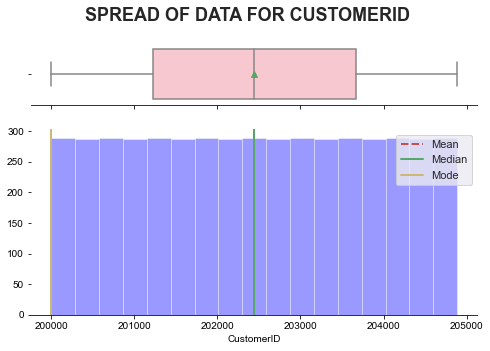

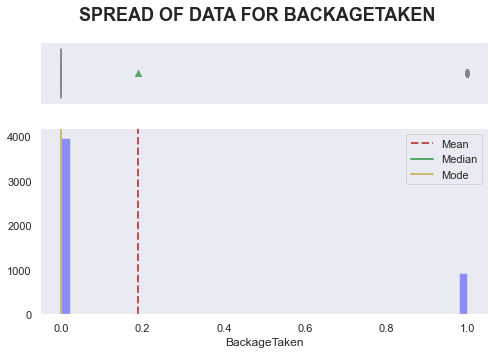

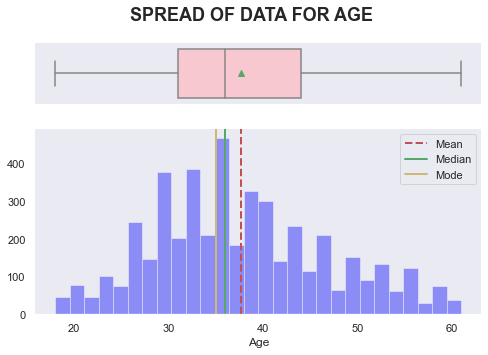

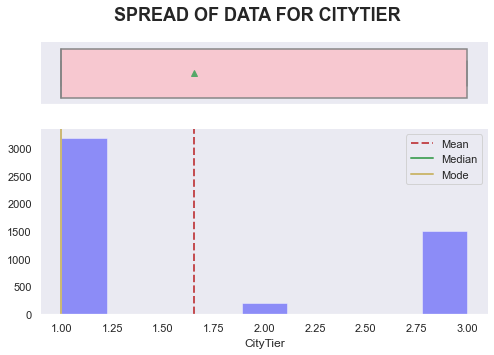

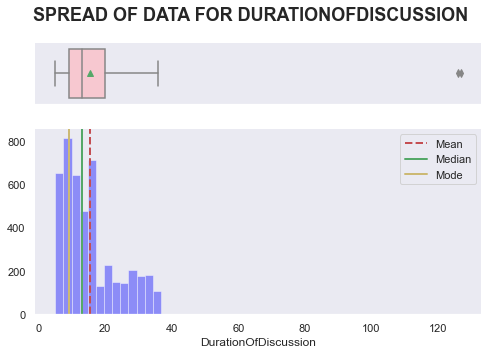

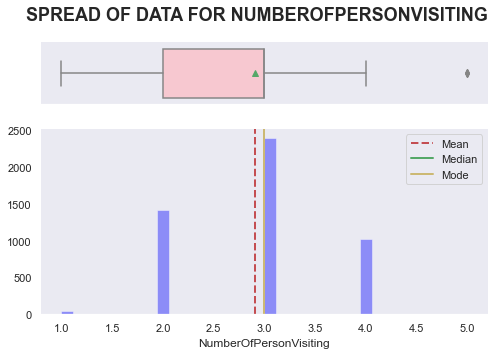

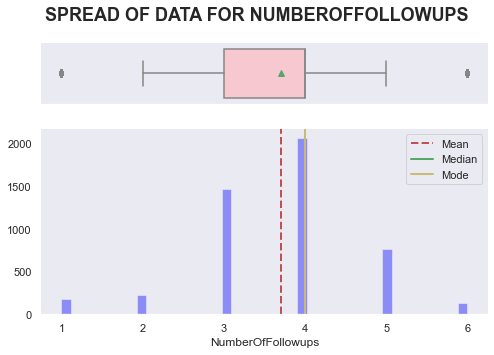

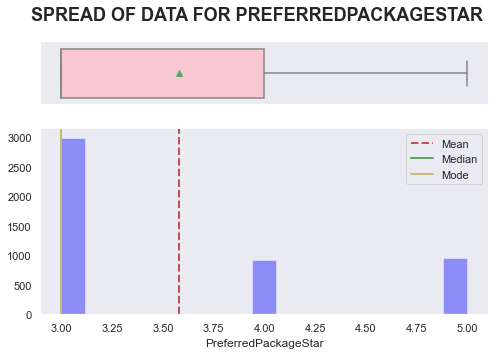

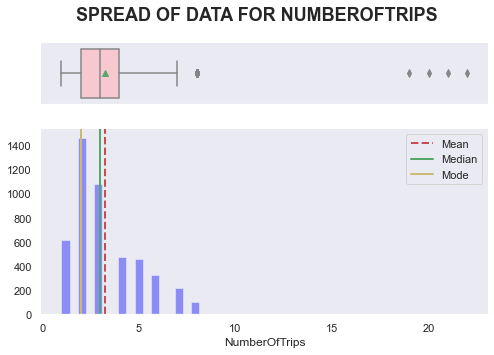

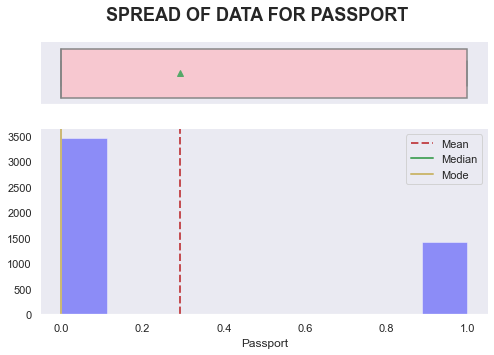

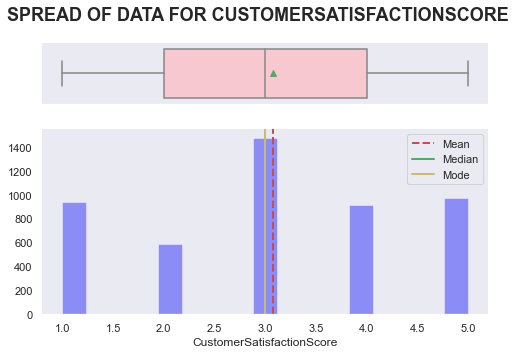

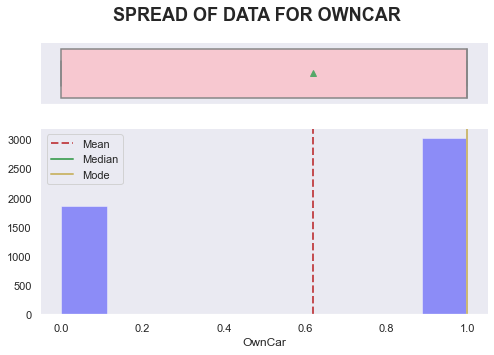

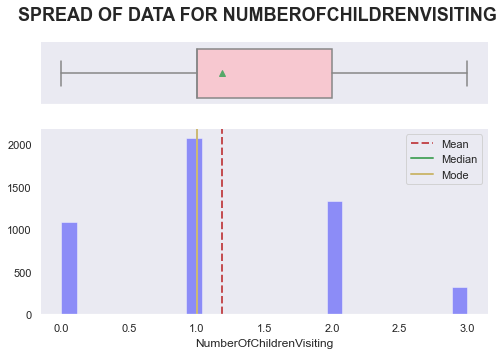

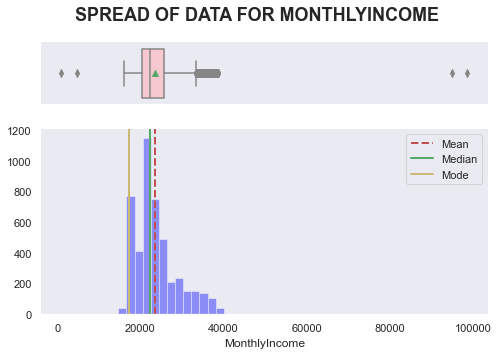

In [12]:
def dist_box(data):
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  = plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().to_list()[0]
    sns.set(style="dark")
    
    #the first graph wich shows central tendencies,outliners,spread and dispersion
    
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='',color="pink",ax=ax_box)
    ax_box.set(xlabel='')
    
    
    #the 2nd graph which contains mean,median,mode and each column data
    sns.despine(top=True,right=True,left=True) 
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

   
list_col=  dp.select_dtypes(include='number').columns.to_list() #to group all the numberical coloums into a list
for i in range(len(list_col)):  #to run all the grouped coloums 
    dist_box(dp[list_col[i]])

In [13]:
#Age is normally distrubted and doesn't have any outliers
#Duration of pitch is Right skewed with some outliers greater than 120 .Need to see if this are to be treated#.
#Number of visitors is usually 3 with a outlier of 5.
#Average number of folows up are 4 with extreme of 6
#Number of trips is right skewed with some outliers where trips are greater than 17.
#Monthly income is Right skewed. and has some outlier as higher end.

# catogarical values

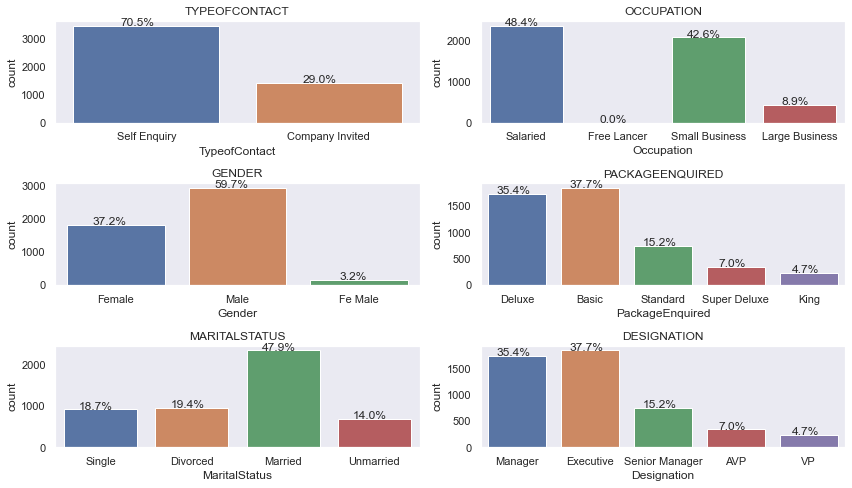

In [14]:
# Making a list of all categorical variables

plt.figure(figsize=(12,20))
sns.set_theme(style="dark") 
cols=dp.select_dtypes(include='object').columns.to_list()
for i, variable in enumerate(cols):
        
        plt.subplot(9,2,i+1)
        order = dp[variable].value_counts(ascending=False).index      
        ax=sns.countplot(dp[variable])
        for p in ax.patches:
           percentage = '{:.1f}%'.format(100 * p.get_height()/len(dp[variable]))
           x = p.get_x() + p.get_width() / 2 - 0.05
           y = p.get_y() + p.get_height()
           plt.annotate(percentage, (x, y),ha='center')
        plt.tight_layout()
        plt.title(cols[i].upper())

# Multivariable analysis

<AxesSubplot:>

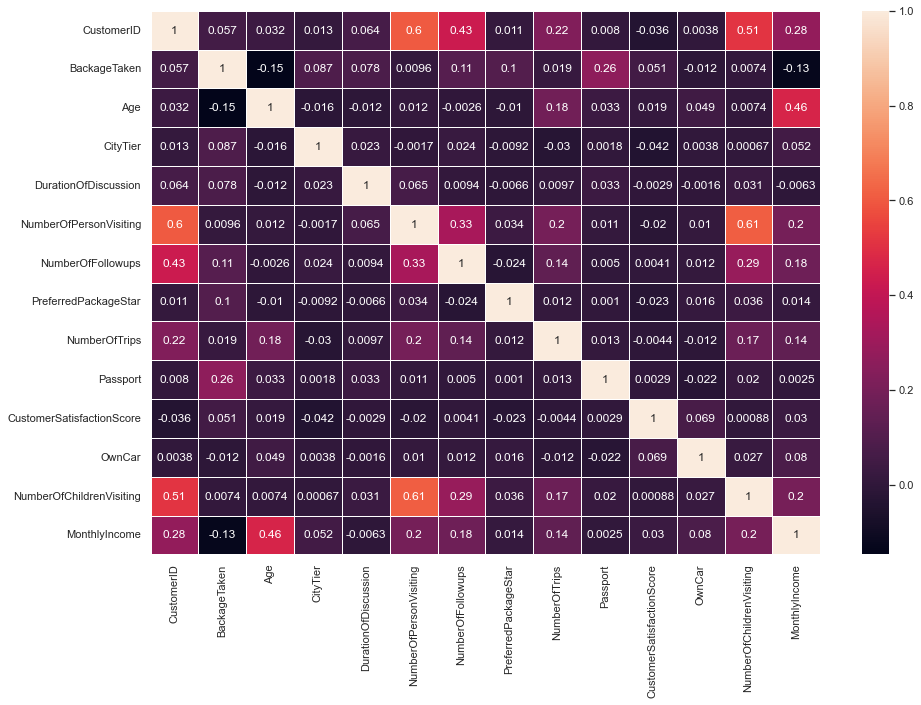

In [15]:
dp.corr()
plt.figure(figsize=[15,10])
sns.heatmap(dp.corr(),annot=True,linewidth=1)

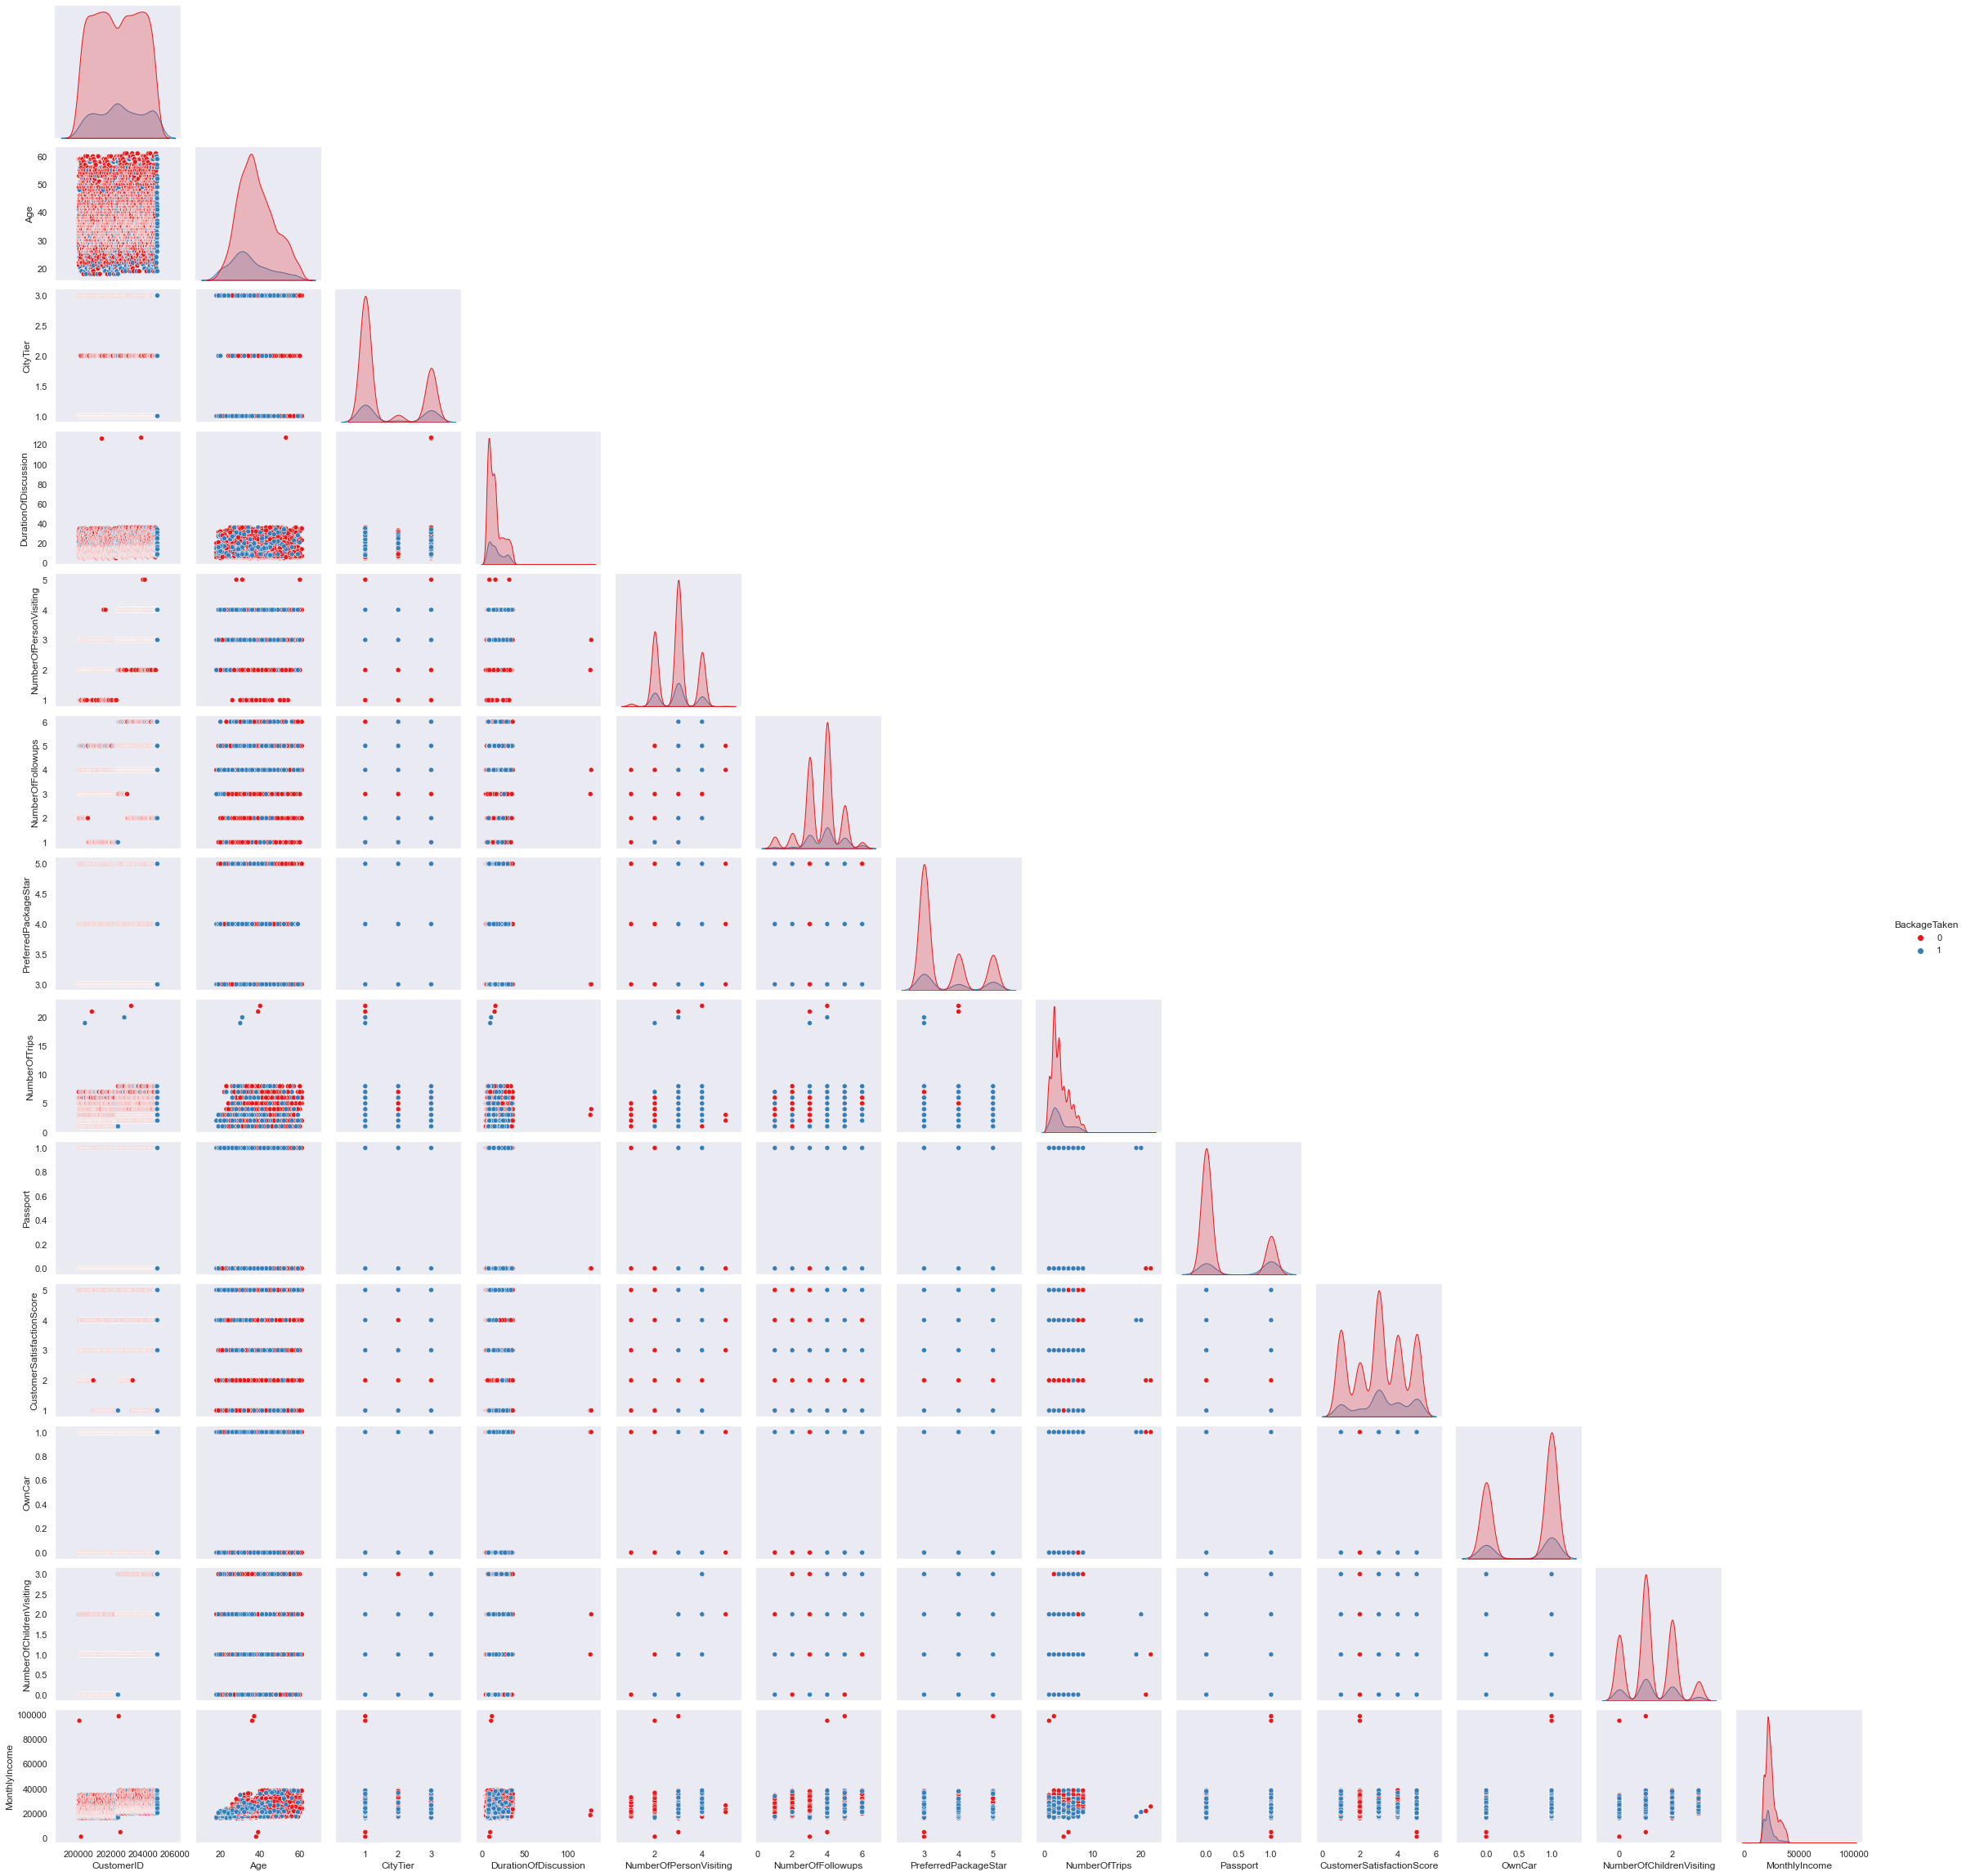

In [16]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(dp, hue="BackageTaken",corner=True)
plt.show()

In [17]:
def plot(x,target='BackageTaken'):
    fig,axs = plt.subplots(2,2,figsize=(15,10))
    axs[0, 0].set_title(f'Distribution of {x} \n of a customer who had Not taken Package',fontsize=14,fontweight='bold')
    sns.distplot(dp[(dp[target] == 0)][x],ax=axs[0,0],color='blue')
    axs[0, 1].set_title(f"Distribution of {x}\n of a customer who had taken Package",fontsize=14,fontweight='bold')
    sns.distplot(dp[(dp[target] == 1)][x],ax=axs[0,1],color='green')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Package Taken',fontsize=14,fontweight='bold')
    sns.boxplot(dp[target],dp[x],ax=axs[1,0],color= "pink",showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Package Taken',fontsize=14,fontweight='bold')
    sns.boxplot(dp[target],dp[x],ax=axs[1,1],showfliers=False,color="purple",showmeans=True)
    sns.despine(top=True,right=True,left=True)
    plt.tight_layout(pad=5)
    plt.show()

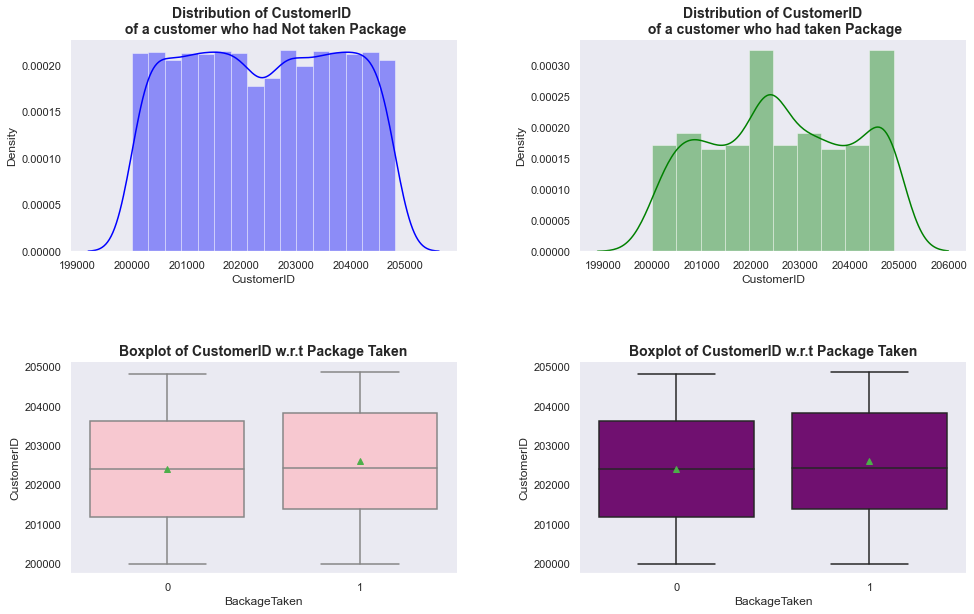

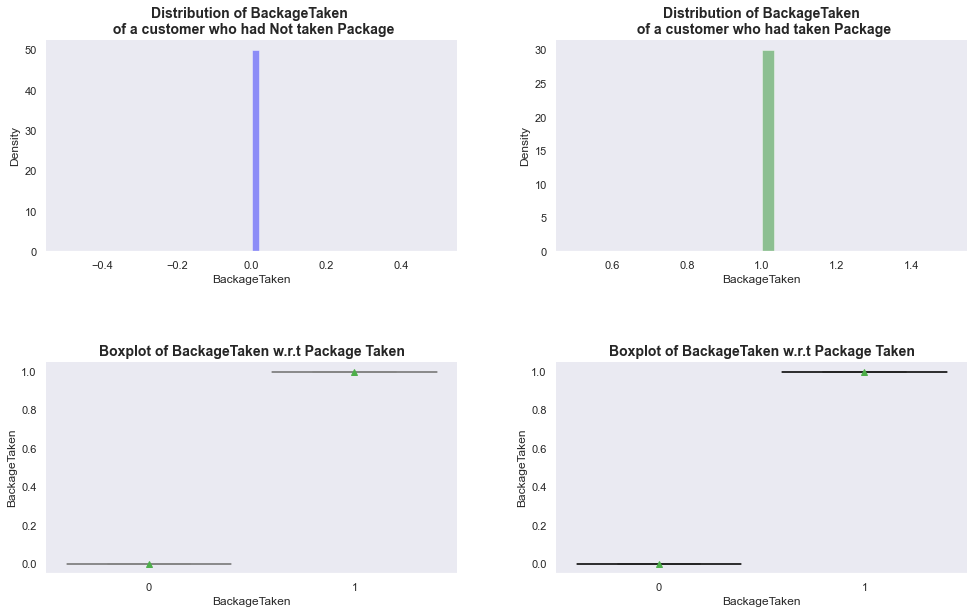

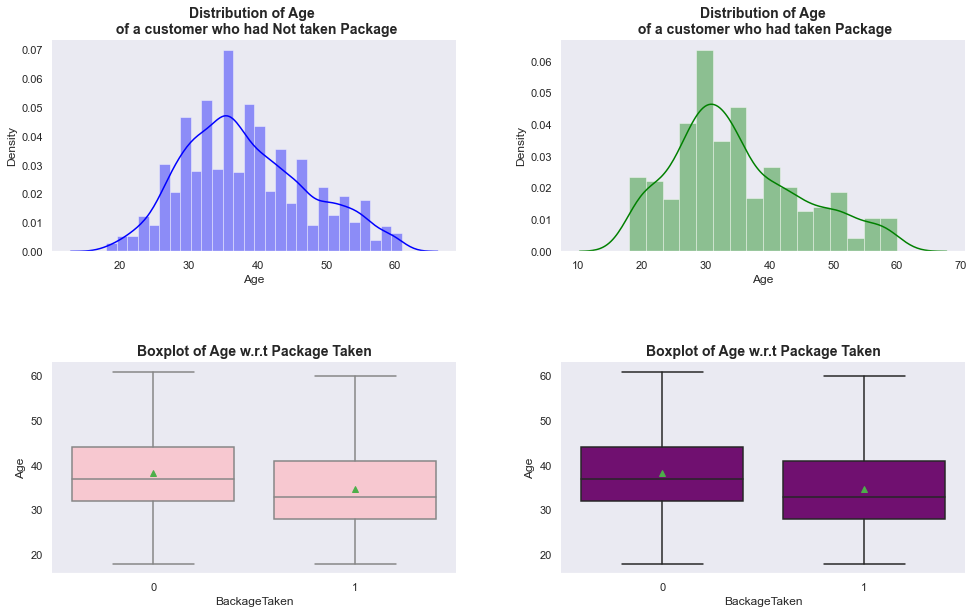

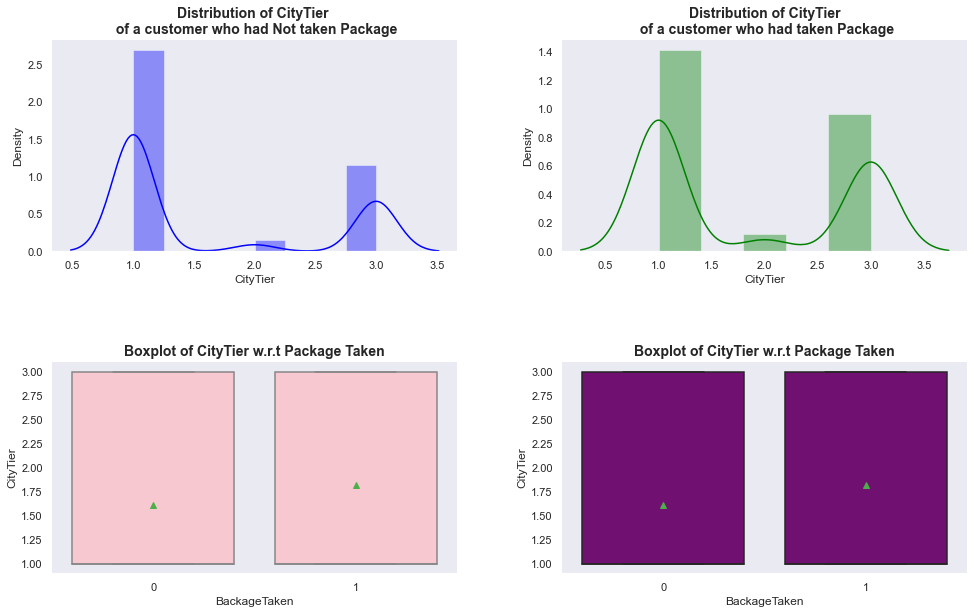

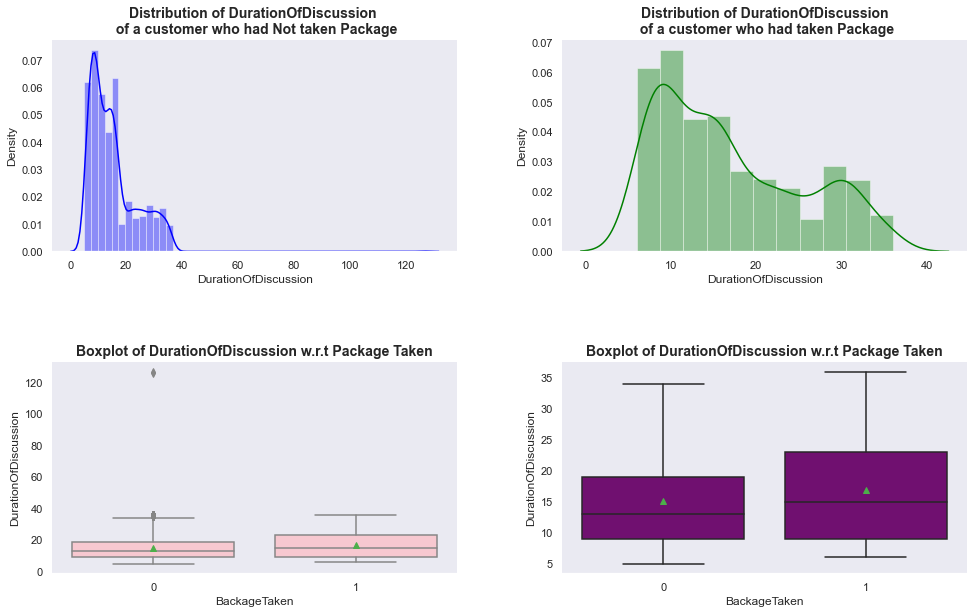

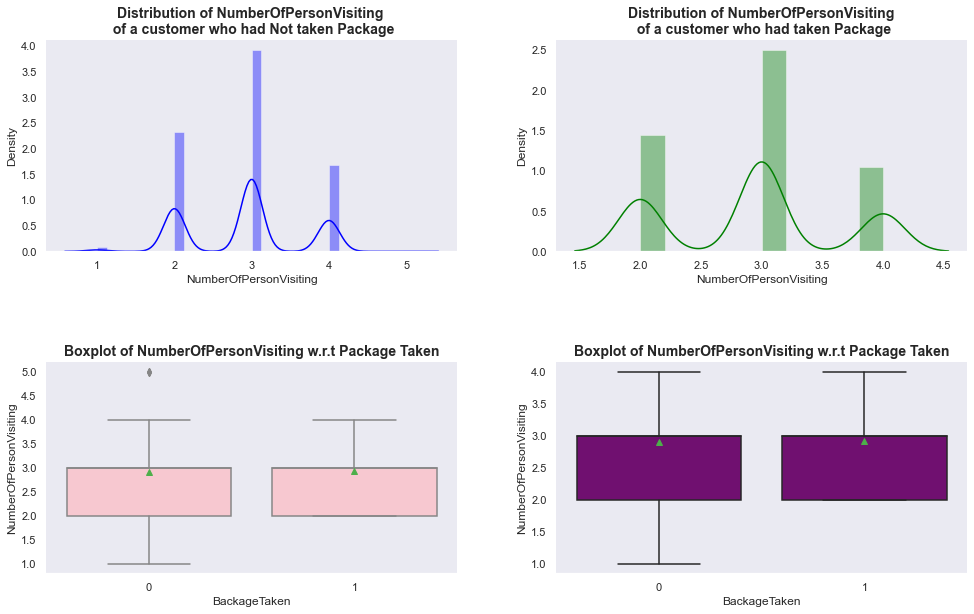

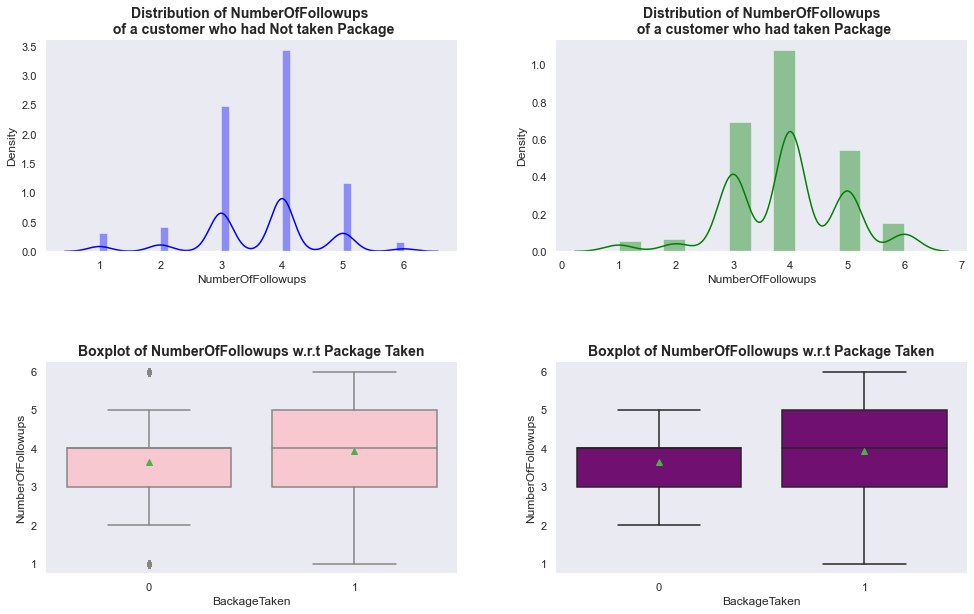

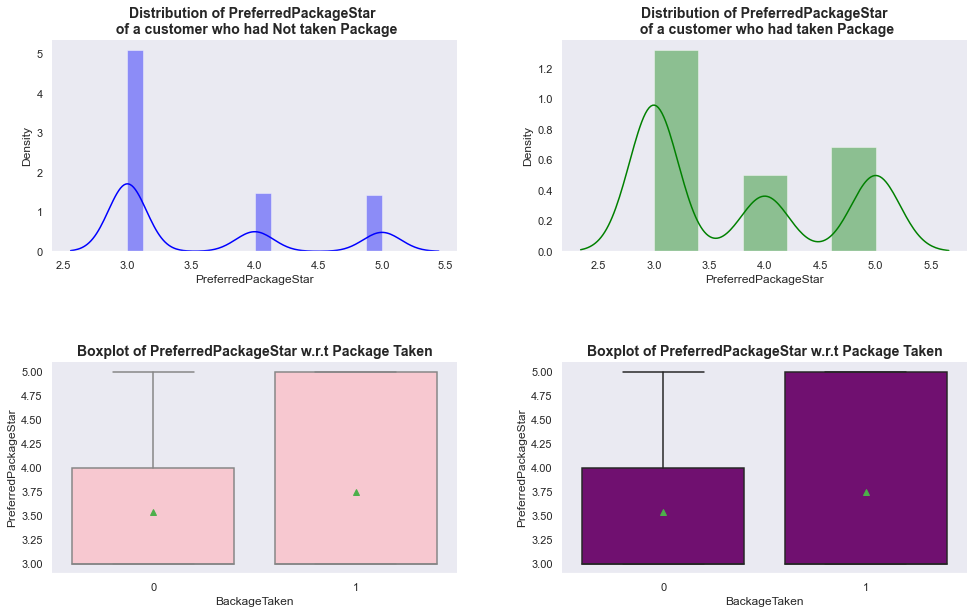

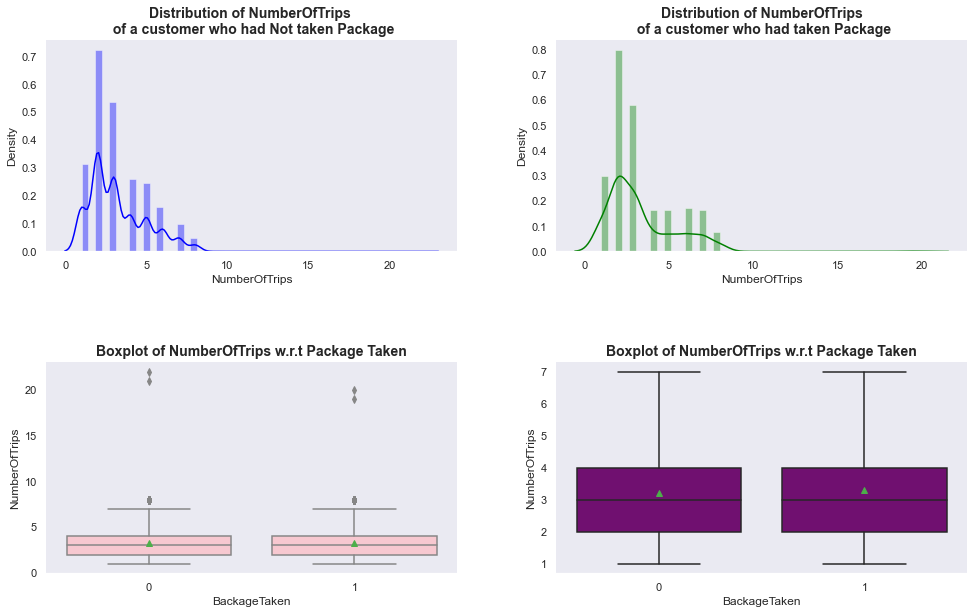

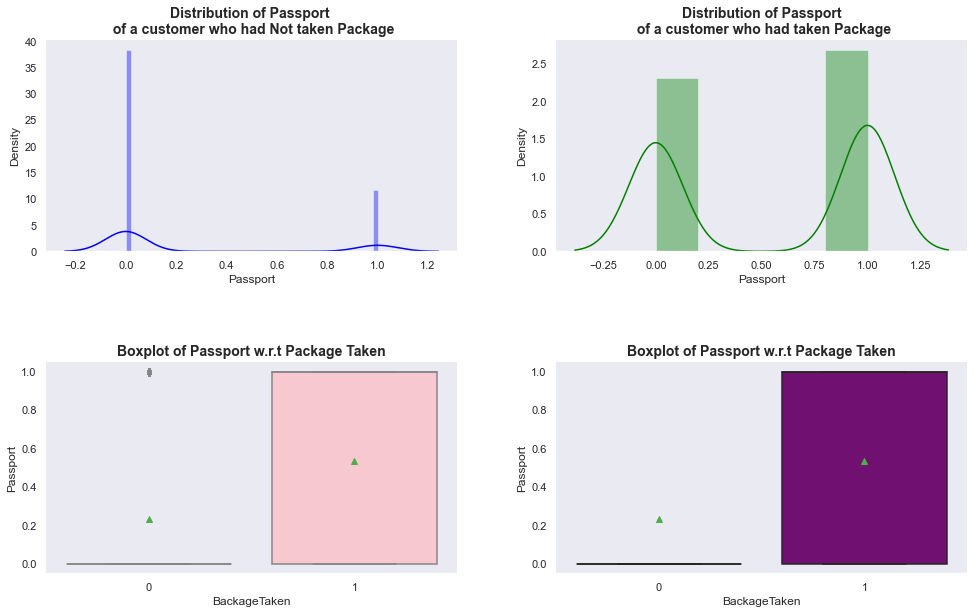

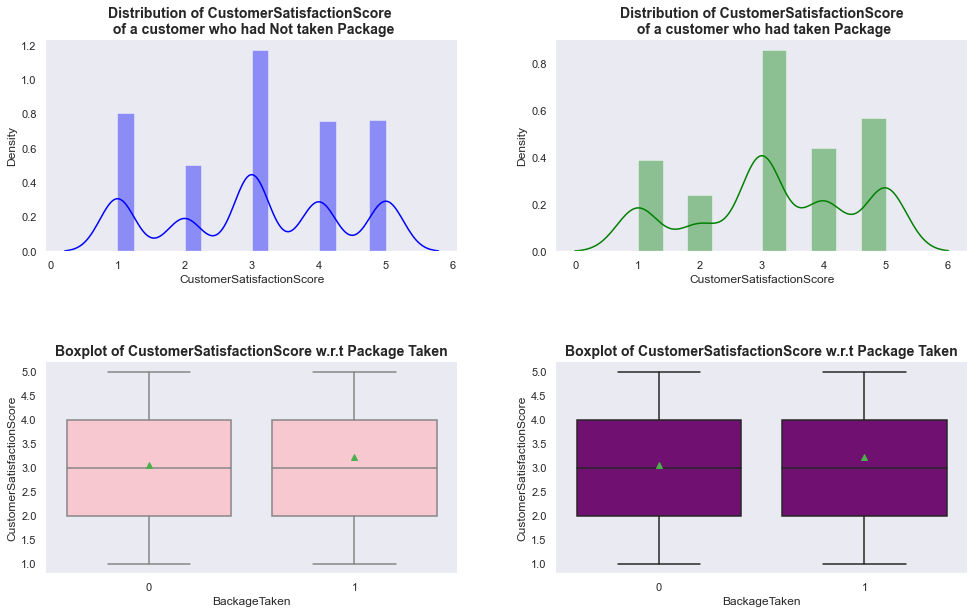

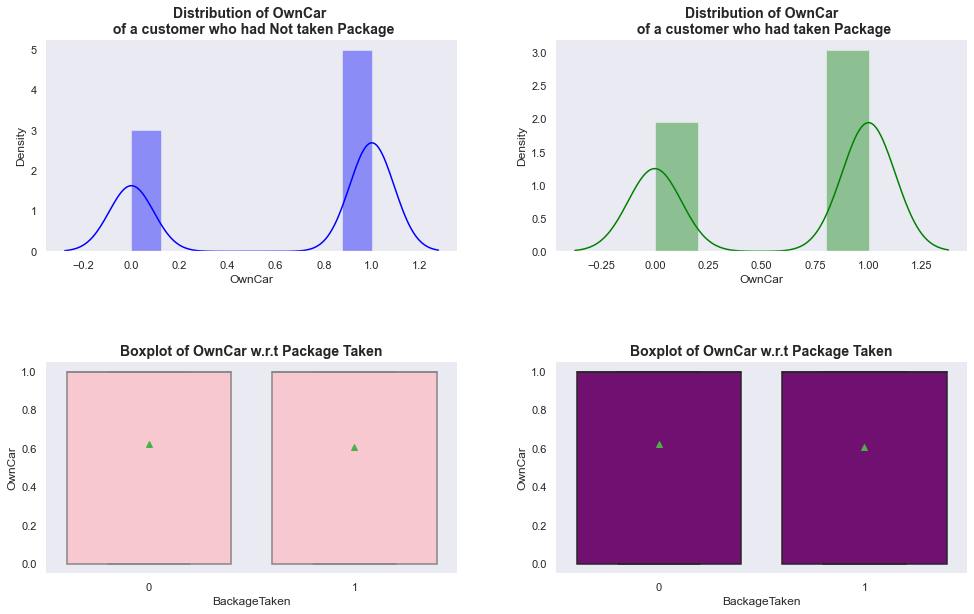

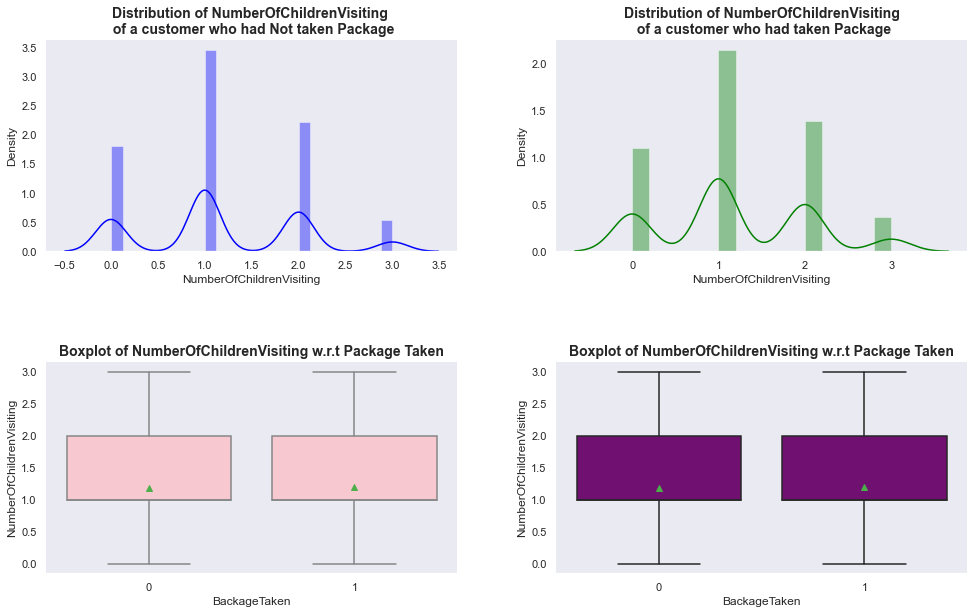

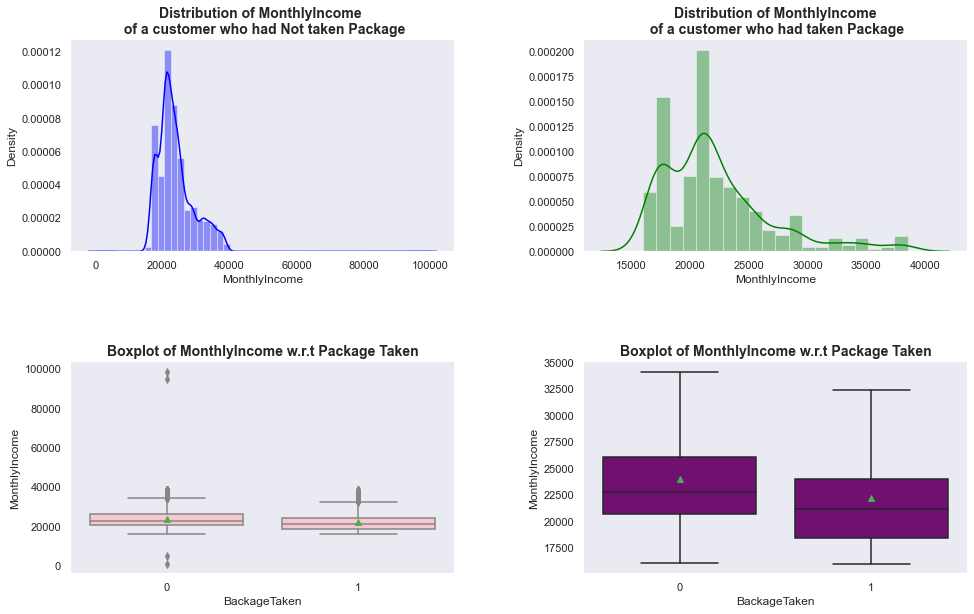

<Figure size 432x288 with 0 Axes>

In [18]:
list_col=dp.select_dtypes(include='number').columns.to_list()
for j in range(len(list_col)):
   plot(list_col[j])
sns.despine(top=True,right=True,left=True)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Occupation'>

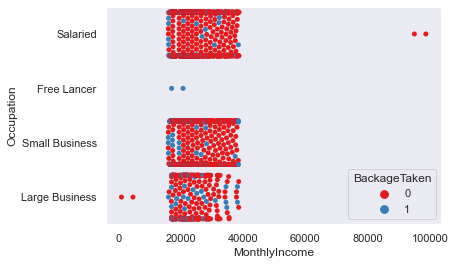

In [19]:
sns.swarmplot(x=dp["MonthlyIncome"],y=dp["Occupation"],hue=dp["BackageTaken"])

# Correction of Dataset

# Convertion Of Fe male INto Female

In [20]:
dp["Gender"].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [21]:
dp["Gender"] = ["Female" if x in ["Female","Fe Male"] else x for x in dp["Gender"]]

In [22]:
dp["Gender"].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

# Removing missing values

In [23]:
dp.isnull().sum().sum()

1012

In [24]:
dp["MonthlyIncome"].fillna(dp["MonthlyIncome"].median(),inplace=True)

In [25]:
dp["NumberOfFollowups"].fillna(dp["NumberOfFollowups"].median(),inplace=True)

In [26]:
dp["Age"].fillna(dp["Age"].mean(),inplace=True)

In [27]:
dp["TypeofContact"].fillna(random.choice(["Self Enquiry","Company Invited"]),inplace=True)

In [28]:
dp['PreferredPackageStar'].fillna(dp['PreferredPackageStar'].median(),inplace = True)

In [29]:
dp['NumberOfTrips'].fillna(dp['NumberOfTrips'].median(),inplace = True)

In [30]:
dp["DurationOfDiscussion"].fillna(dp["DurationOfDiscussion"].mean,inplace=True)

In [31]:
dp['NumberOfChildrenVisiting'].fillna(0,inplace = True)

# No of people according to Age

In [32]:
dp["AgeBin"] = pd.cut(dp['Age'], bins=[15, 25, 35, 45, 55 ,65 ], labels = ['15-25','26-35','36-45','46-55','56-65'])
dp["AgeBin"]

0       36-45
1       46-55
2       36-45
3       26-35
4       36-45
        ...  
4883    46-55
4884    26-35
4885    46-55
4886    15-25
4887    36-45
Name: AgeBin, Length: 4888, dtype: category
Categories (5, object): ['15-25' < '26-35' < '36-45' < '46-55' < '56-65']

# No of people according to Monthly

In [33]:
dp['IncomeBin'] = pd.cut(dp['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])
dp["IncomeBin"].value_counts()

<25000     2490
<20000     1038
<30000      768
<35000      382
<40000      206
<15000        2
<100000       2
<45000        0
<50000        0
Name: IncomeBin, dtype: int64

In [34]:
dp.isnull().sum()

CustomerID                   0
BackageTaken                 0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfDiscussion         0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
PackageEnquired              0
PreferredPackageStar         0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
CustomerSatisfactionScore    0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
AgeBin                       0
IncomeBin                    0
dtype: int64

In [35]:
dp["AgeBin"].value_counts()

26-35    1805
36-45    1762
46-55     774
15-25     347
56-65     200
Name: AgeBin, dtype: int64

# Analysis of data

In [36]:
pd.crosstab(dp["AgeBin"],columns=dp["PackageEnquired"])

PackageEnquired,Basic,Deluxe,King,Standard,Super Deluxe
AgeBin,,,,,
15-25,295,50,0,2,0
26-35,850,717,2,222,14
36-45,564,703,84,305,106
46-55,85,223,114,169,183
56-65,48,39,30,44,39


Text(0.5, 1.0, 'Agebin Product wise')

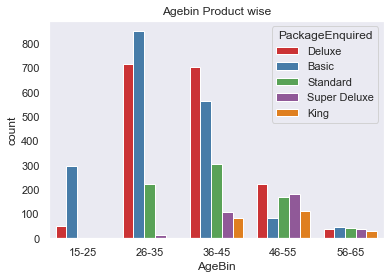

In [37]:
IMPORTING 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric
from sklearn.svm import SVC

Importing The File

dp= pd.read_csv("trip_package.csv")
dp

columdp.ns

The Initial Analysis Of Data

The number of missing values

dp.isnull().sum().sort_values(ascending=False)


Percentage of missing values

print(round(dp.isna().sum() / dp.isna().count() * 100, 2).sort_values(ascending=False))

dp["Gender"].value_counts()



Statically refernce of all coloums


dp.describe()


Categorical and numerical value


dp.dtypes.value_counts()


Analysis of All Coloums
Univariable Analysis



dp.isnull().sum().sort_values(ascending=False)

dp.describe()

dp.head()

UNIVARIABLE ANALYSIS

def dist_box(data):
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  = plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().to_list()[0]
    sns.set(style="dark")
    
    #the first graph wich shows central tendencies,outliners,spread and dispersion
    
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='',color="pink",ax=ax_box)
    ax_box.set(xlabel='')
    
    
    #the 2nd graph which contains mean,median,mode and each column data
    sns.despine(top=True,right=True,left=True) 
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

   
list_col=  dp.select_dtypes(include='number').columns.to_list() #to group all the numberical coloums into a list
for i in range(len(list_col)):  #to run all the grouped coloums 
    dist_box(dp[list_col[i]])



catogarical values


# Making a list of all categorical variables

plt.figure(figsize=(12,20))
sns.set_theme(style="dark") 
cols=dp.select_dtypes(include='object').columns.to_list()
for i, variable in enumerate(cols):
        
        plt.subplot(9,2,i+1)
        order = dp[variable].value_counts(ascending=False).index      
        ax=sns.countplot(dp[variable])
        for p in ax.patches:
           percentage = '{:.1f}%'.format(100 * p.get_height()/len(dp[variable]))
           x = p.get_x() + p.get_width() / 2 - 0.05
           y = p.get_y() + p.get_height()
           plt.annotate(percentage, (x, y),ha='center')
        plt.tight_layout()
        plt.title(cols[i].upper())



Multivariable analysis


dp.corr()
plt.figure(figsize=[15,10])
sns.heatmap(dp.corr(),annot=True,linewidth=1)



sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(dp, hue="BackageTaken",corner=True)
plt.show()



def plot(x,target='BackageTaken'):
    fig,axs = plt.subplots(2,2,figsize=(15,10))
    axs[0, 0].set_title(f'Distribution of {x} \n of a customer who had Not taken Package',fontsize=14,fontweight='bold')
    sns.distplot(dp[(dp[target] == 0)][x],ax=axs[0,0],color='blue')
    axs[0, 1].set_title(f"Distribution of {x}\n of a customer who had taken Package",fontsize=14,fontweight='bold')
    sns.distplot(dp[(dp[target] == 1)][x],ax=axs[0,1],color='green')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Package Taken',fontsize=14,fontweight='bold')
    sns.boxplot(dp[target],dp[x],ax=axs[1,0],color= "pink",showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Package Taken',fontsize=14,fontweight='bold')
    sns.boxplot(dp[target],dp[x],ax=axs[1,1],showfliers=False,color="purple",showmeans=True)
    sns.despine(top=True,right=True,left=True)
    plt.tight_layout(pad=5)
    plt.show()




list_col=dp.select_dtypes(include='number').columns.to_list()
for j in range(len(list_col)):
   plot(list_col[j])
sns.despine(top=True,right=True,left=True)



Correction of Dataset
Convertion Of Fe male INto Female


dp["Gender"].value_counts()


dp["Gender"] = ["Female" if x in ["Female","Fe Male"] else x for x in dp["Gender"]]

dp["Gender"].value_counts()


Removing missing values


dp.isnull().sum().sum()


dp["MonthlyIncome"].fillna(dp["MonthlyIncome"].median(),inplace=True)


dp["NumberOfFollowups"].fillna(dp["NumberOfFollowups"].median(),inplace=True)

dp["Age"].fillna(dp["Age"].mean(),inplace=True)


dp["TypeofContact"].fillna(random.choice(["Self Enquiry","Company Invited"]),inplace=True)


dp['PreferredPackageStar'].fillna(dp['PreferredPackageStar'].median(),inplace = True)


dp['NumberOfTrips'].fillna(dp['NumberOfTrips'].median(),inplace = True)



dp["DurationOfDiscussion"].fillna(dp["DurationOfDiscussion"].mean,inplace=True)


dp['NumberOfChildrenVisiting'].fillna(0,inplace = True)




No of people according to Age

dp["AgeBin"] = pd.cut(dp['Age'], bins=[15, 25, 35, 45, 55 ,65 ], labels = ['15-25','26-35','36-45','46-55','56-65'])
dp["AgeBin"]


No of people according to Monthly


dp['IncomeBin'] = pd.cut(dp['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])
dp["IncomeBin"].value_counts()



dp.isnull().sum()



dp["AgeBin"].value_counts()


Analysis of data


pd.crosstab(dp["AgeBin"],columns=dp["PackageEnquired"])


sns.countplot(x="AgeBin",hue='PackageEnquired',data=dp).set_title('Agebin Product wise')

sns.catplot(x='AgeBin',hue='PackageEnquired',col='BackageTaken',data=dp,kind="count")



Probality of all coloums

def stacked_plot(x):
    sns.set_palette(sns.color_palette("nipy_spectral", 8))
    tab1 = pd.crosstab(x,dp['BackageTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,dp['BackageTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Product Taken",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True)
   
    plt.show()


list_columns=['TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting','PreferredPackageStar',
              'NumberOfTrips','MaritalStatus','Passport','OwnCar','Designation','AgeBin','IncomeBin','NumberOfFollowups']
for i, variable in enumerate(list_columns):
       stacked_plot(dp[variable])



Total length of the dataset before outliers detection



len(dp)



Outliers Detection¶


numeric_columns = dp.select_dtypes(include="number").columns.to_list()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(dp[variable],whis=2)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()



columns = ['MonthlyIncome','NumberOfTrips']
plt.figure(figsize=(20,30))

for i, variable in enumerate(columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(dp[variable],whis=2)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()


dp.sort_values(by=["MonthlyIncome"],ascending = False).head(5)

dp.sort_values(by=["MonthlyIncome"],ascending = True).head(5)


dp.sort_values(by=["NumberOfTrips"],ascending = False).head(5)

dp[(dp.MonthlyIncome>40000) | (dp.MonthlyIncome<10000)]


dp[((dp["NumberOfTrips"]>8))]



Removing The Outliers


dp.drop(index=dp[(dp.MonthlyIncome>40000) | (dp.MonthlyIncome<12000)].index,inplace=True)

dp.drop(index=dp[dp.NumberOfTrips>10].index,inplace=True)


columns = ['MonthlyIncome','NumberOfTrips']
plt.figure(figsize=(20,30))

for i, variable in enumerate(columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(dp[variable],whis=2)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()


Total length of the dataset after outliers detection


len(dp)


Features And Targets

Splittig Train And Test data


X = dp.drop(['BackageTaken','CustomerSatisfactionScore','NumberOfFollowups','DurationOfDiscussion','AgeBin','IncomeBin','PackageEnquired'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = dp['BackageTaken']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape


def make_confusion_matrix(y_actual,y_predict,title):
    '''Plot confusion matrix'''
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Blues',colorbar=True,ax=ax)
    
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()


def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    if flag == True: 
          metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
          cols = ['Metric', 'Score']
          records = [(name, score) for name, score in zip(metric_names, score_list)]
          display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
          make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
          make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list # returning the list with train and test score



# # defining empty lists to add train and test results 
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''add score of modelto list'''
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])


DecisionTreeClassifier


dtree=DecisionTreeClassifier(random_state=1, class_weight={0:0.30, 1:0.70},max_depth=3)
dtree1 = dtree.fit(X_train,y_train)

dtree_score=get_metrics_score(dtree,X_train,X_test,y_train,y_test)
add_score_model(dtree_score)

fig = plt.figure(figsize=(8, 6), dpi=150)
tree.plot_tree(dtree1)
plt.show()


BaggingClassifier


bagging_classifier = BaggingClassifier(random_state=1, verbose=1)
bagging_classifier.fit(X_train,y_train)

bagging_score=get_metrics_score(bagging_classifier,X_train,X_test,y_train,y_test)
add_score_model(bagging_score)


RandomForestClassifier


rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)


score_list_rf=get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)
add_score_model(score_list_rf)


Support vector machines


svm = SVC(random_state=1)
svm.fit(X_train,y_train)


score_list_rf=get_metrics_score(svm,X_train,X_test,y_train,y_test)
add_score_model(score_list_rf)


comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          'Support Vector Machine',
                                          
                                          ], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,
                                          'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,
                                          'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

comparison_frame.sort_values(by='Test_Recall',ascending=False)

Tuning Decision Tree

dtree_tuned = DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1)


parameters = {'max_depth': [1,4,7,15], 
              'min_samples_leaf': [2,3,5],
              'max_leaf_nodes' : [ 5,7,10,15]
              
             }


scorer = metrics.make_scorer(metrics.recall_score)


grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)


dtree_tuned = grid_obj.best_estimator_


dtree_tuned.fit(X_train, y_train)


score_tune_dt=get_metrics_score(dtree_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_dt) # add score to dataframe



Tuning Random Forest



rf_tuned = RandomForestClassifier(class_weight={0:0.20,1:0.80},random_state=1)

parameters = { "max_depth":[5,9,15],
               "n_estimators": [150,200,250,500],
               "min_samples_leaf": np.arange(5, 10),
                "max_features": ['auto'],
                "max_samples": np.arange(0.3,0.5, 0.7)
              }

scorer = metrics.make_scorer(metrics.recall_score)


grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)


rf_tuned = grid_obj.best_estimator_

 
rf_tuned.fit(X_train, y_train)



score_tune_rt=get_metrics_score(rf_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_rt) 


Tuning Bagging Classifier

bagging_estimator_tuned = BaggingClassifier(DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1),random_state=1)


parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


bagging_estimator_tuned = grid_obj.best_estimator_


bagging_estimator_tuned.fit(X_train, y_train)


bagging_tuned=get_metrics_score(bagging_estimator_tuned,X_train,X_test,y_train,y_test)
add_score_model(bagging_tuned)


xgb_tuned = XGBClassifier(random_state=1)

parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,5],
    "colsample_bylevel":[0.5,1],
    "learning_rate":[0.001,0.01,0.1,0.5]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)


grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_


xgb_tuned.fit(X_train, y_train)



xgb_tuned_score=get_metrics_score(xgb_tuned,X_train,X_test,y_train,y_test)
add_score_model(xgb_tuned_score)


Model Building Boosting¶
Adaboost


adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)



vadaboost_score=get_metrics_score(adaboost,X_train,X_test,y_train,y_test)
add_score_model(adaboost_score)



Gradient Boost


gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)



gbc_score=get_metrics_score(gbc,X_train,X_test,y_train,y_test)
add_score_model(gbc_score)



XGBoost


xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

xgb_score=get_metrics_score(xgb,X_train,X_test,y_train,y_test)
add_score_model(xgb_score)


comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          'Support Vector Machine',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier',
                                          'xgb_tuned',
                                          'AdaBoost',
                                          'Gradient Boost',
                                          'XGboost',
                                          ], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,
                                          'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,
                                          'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

comparison_frame.sort_values(by='Test_Recall',ascending=False)



























sns.countplot(x="AgeBin",hue='PackageEnquired',data=dp).set_title('Agebin Product wise')

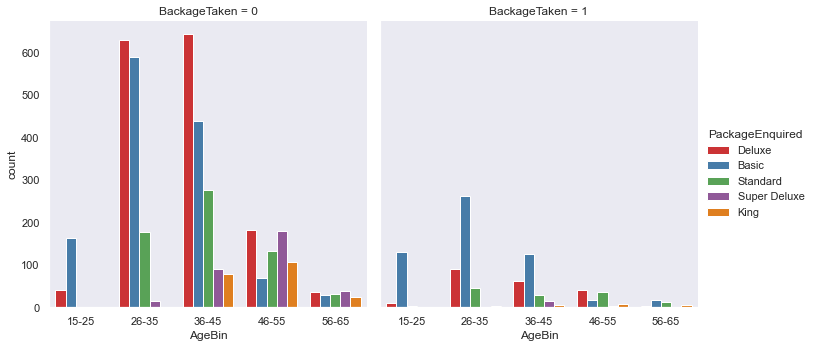

In [38]:
sns.catplot(x='AgeBin',hue='PackageEnquired',col='BackageTaken',data=dp,kind="count")

# Observation

In [39]:
#Basic packag :-The age groupfrom  15 to 25 has the higest accepting rate .While 31-40 hast the lowest accepting rate.Almost all age groups have accepted this package 
#Standard :- The higest acceptance rate is in the 51 -70. Lowest acceptance rate is form 35-45.This package was enquired from all the age groups except 15-25
#Dulex:- The most Enquired package . The higest acceptance rate is from 15-25 since a few people had asked and majority had accepted.While the lowest was the 35-45 group since more than 700 people had enquired about it.
#Super Dulex :- The worst performing package in terms of enquire and acceptance rates.With Higest aceptance rate at 35 -45.The worst performing one is 51- 70.Note the total accepted is less than 50 in total.Thsis has the lowest acceptance rate in theh packages
#King:- The lest enquired packges.The higest acceptance rate is 51-70 while the worst is 35-45
    

# Probality of all coloums

In [40]:
def stacked_plot(x):
    sns.set_palette(sns.color_palette("nipy_spectral", 8))
    tab1 = pd.crosstab(x,dp['BackageTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,dp['BackageTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Product Taken",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True)
   
    plt.show()


BackageTaken        0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


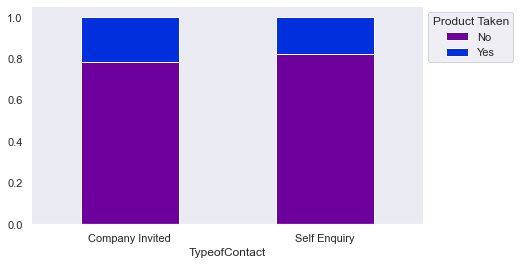

BackageTaken     0    1   All
CityTier                     
1             2670  520  3190
2              152   46   198
3             1146  354  1500
All           3968  920  4888
------------------------------------------------------------------------------------------------------------------------


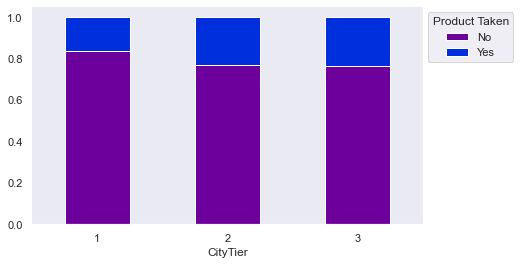

BackageTaken       0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


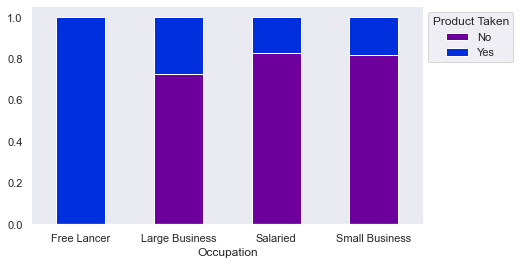

BackageTaken     0    1   All
Gender                       
Female        1630  342  1972
Male          2338  578  2916
All           3968  920  4888
------------------------------------------------------------------------------------------------------------------------


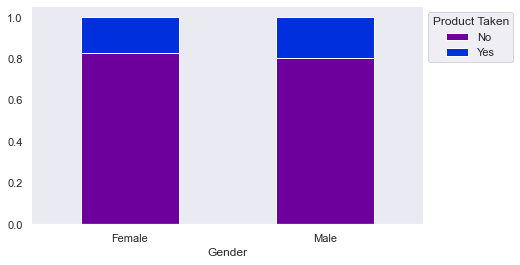

BackageTaken               0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1151  267  1418
3                       1942  460  2402
4                        833  193  1026
5                          3    0     3
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


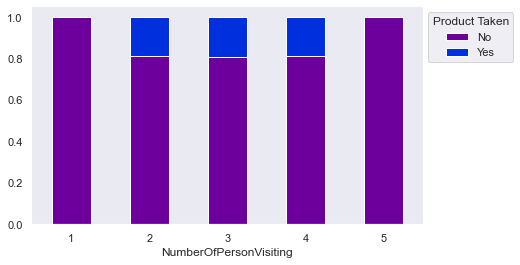

BackageTaken             0    1   All
PreferredPackageStar                 
3.0                   2531  488  3019
4.0                    731  182   913
5.0                    706  250   956
All                   3968  920  4888
------------------------------------------------------------------------------------------------------------------------


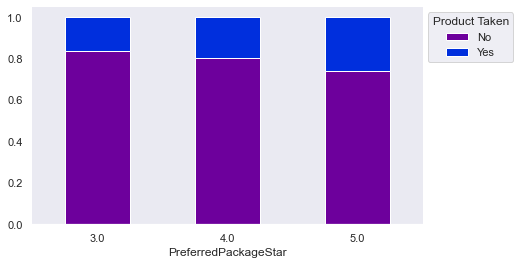

BackageTaken      0    1   All
NumberOfTrips                 
1.0             508  112   620
2.0            1165  299  1464
3.0             990  229  1219
4.0             417   61   478
5.0             396   62   458
6.0             258   64   322
7.0             156   62   218
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


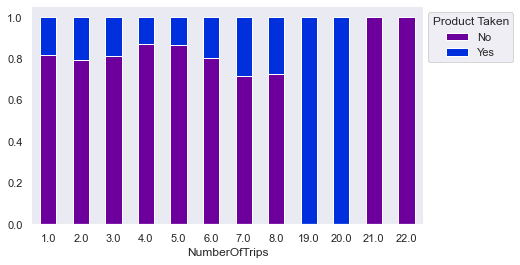

BackageTaken      0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


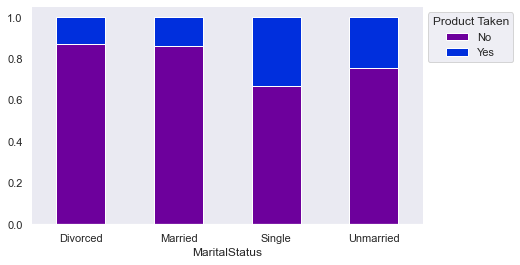

BackageTaken     0    1   All
Passport                     
0             3040  426  3466
1              928  494  1422
All           3968  920  4888
------------------------------------------------------------------------------------------------------------------------


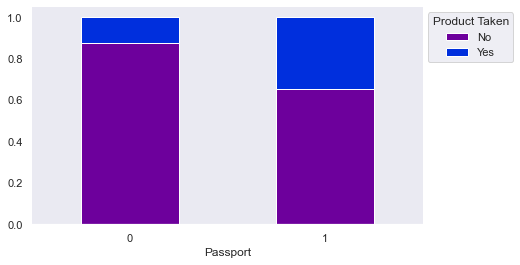

BackageTaken     0    1   All
OwnCar                       
0             1496  360  1856
1             2472  560  3032
All           3968  920  4888
------------------------------------------------------------------------------------------------------------------------


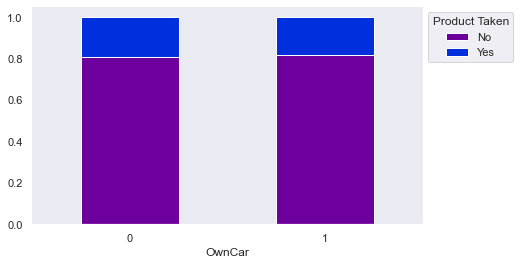

BackageTaken       0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


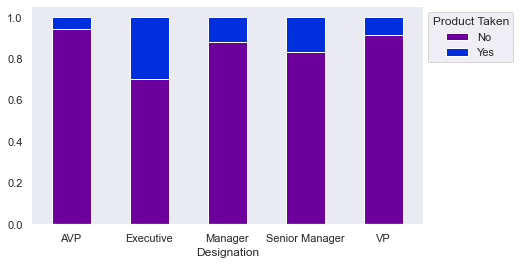

BackageTaken     0    1   All
AgeBin                       
15-25          204  143   347
26-35         1408  397  1805
36-45         1526  236  1762
46-55          671  103   774
56-65          159   41   200
All           3968  920  4888
------------------------------------------------------------------------------------------------------------------------


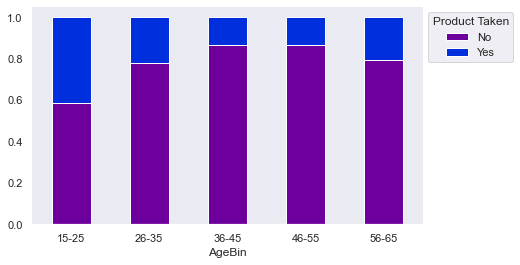

BackageTaken     0    1   All
IncomeBin                    
<15000           2    0     2
<20000         754  284  1038
<25000        2031  459  2490
<30000         651  117   768
<35000         343   39   382
<40000         185   21   206
<100000          2    0     2
All           3968  920  4888
------------------------------------------------------------------------------------------------------------------------


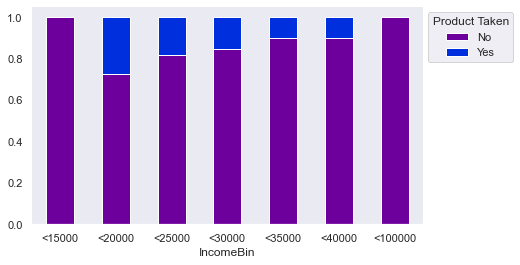

BackageTaken          0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1726  387  2113
5.0                 577  191   768
6.0                  82   54   136
All                3968  920  4888
------------------------------------------------------------------------------------------------------------------------


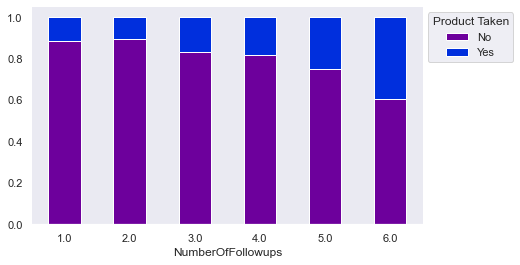

In [41]:
list_columns=['TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting','PreferredPackageStar',
              'NumberOfTrips','MaritalStatus','Passport','OwnCar','Designation','AgeBin','IncomeBin','NumberOfFollowups']
for i, variable in enumerate(list_columns):
       stacked_plot(dp[variable])

# Observation

In [42]:
#The graph shows the probality of taking the package or not.
#The enquiery Type dosent make any significant changes in the acceptance rate of packages.
#City Tier 1 hast the lowest acceptance rate while Tier 2 hst the higest.
#Freelancers tend to accept the package but this may vary due to low sample size. 
#Salaried personal have lowest acceptance rate.
#There is no significant changes in the acceptance rate between the genders.
#The number of people is always 2 or greater the 2 but lesser than 4.
#As expected as the Prefered Package star is incresing the acceptance rate also increases.
#The number of trips dosent affect the acceptance rate much but There is a great increase of acceptance percentage after the 5th trip.
#Single personal have hight acceptance rate while the divorsed hast the lowest.
#The acceptance rate incresases if the person has an Passport.
#Having  or not Having a car dosent effect the acceptance rate.
#Executives have an high acceptance rates ,While the AVP is ths lowest.
#Customers of age 25 to 35 have the higest acepptance rate.WHile ages 15-25 and 55- 65 have low acceptance rates.
#Customers of lower monthy income have higher acceptance. Note 0-10000 is exception due to the fact has low sample size.
#As expected as the number follow up increses the rate of acceptance is also higher.



# Total length of the dataset before outliers detection

In [43]:
len(dp)

4888

# Outliers Detection

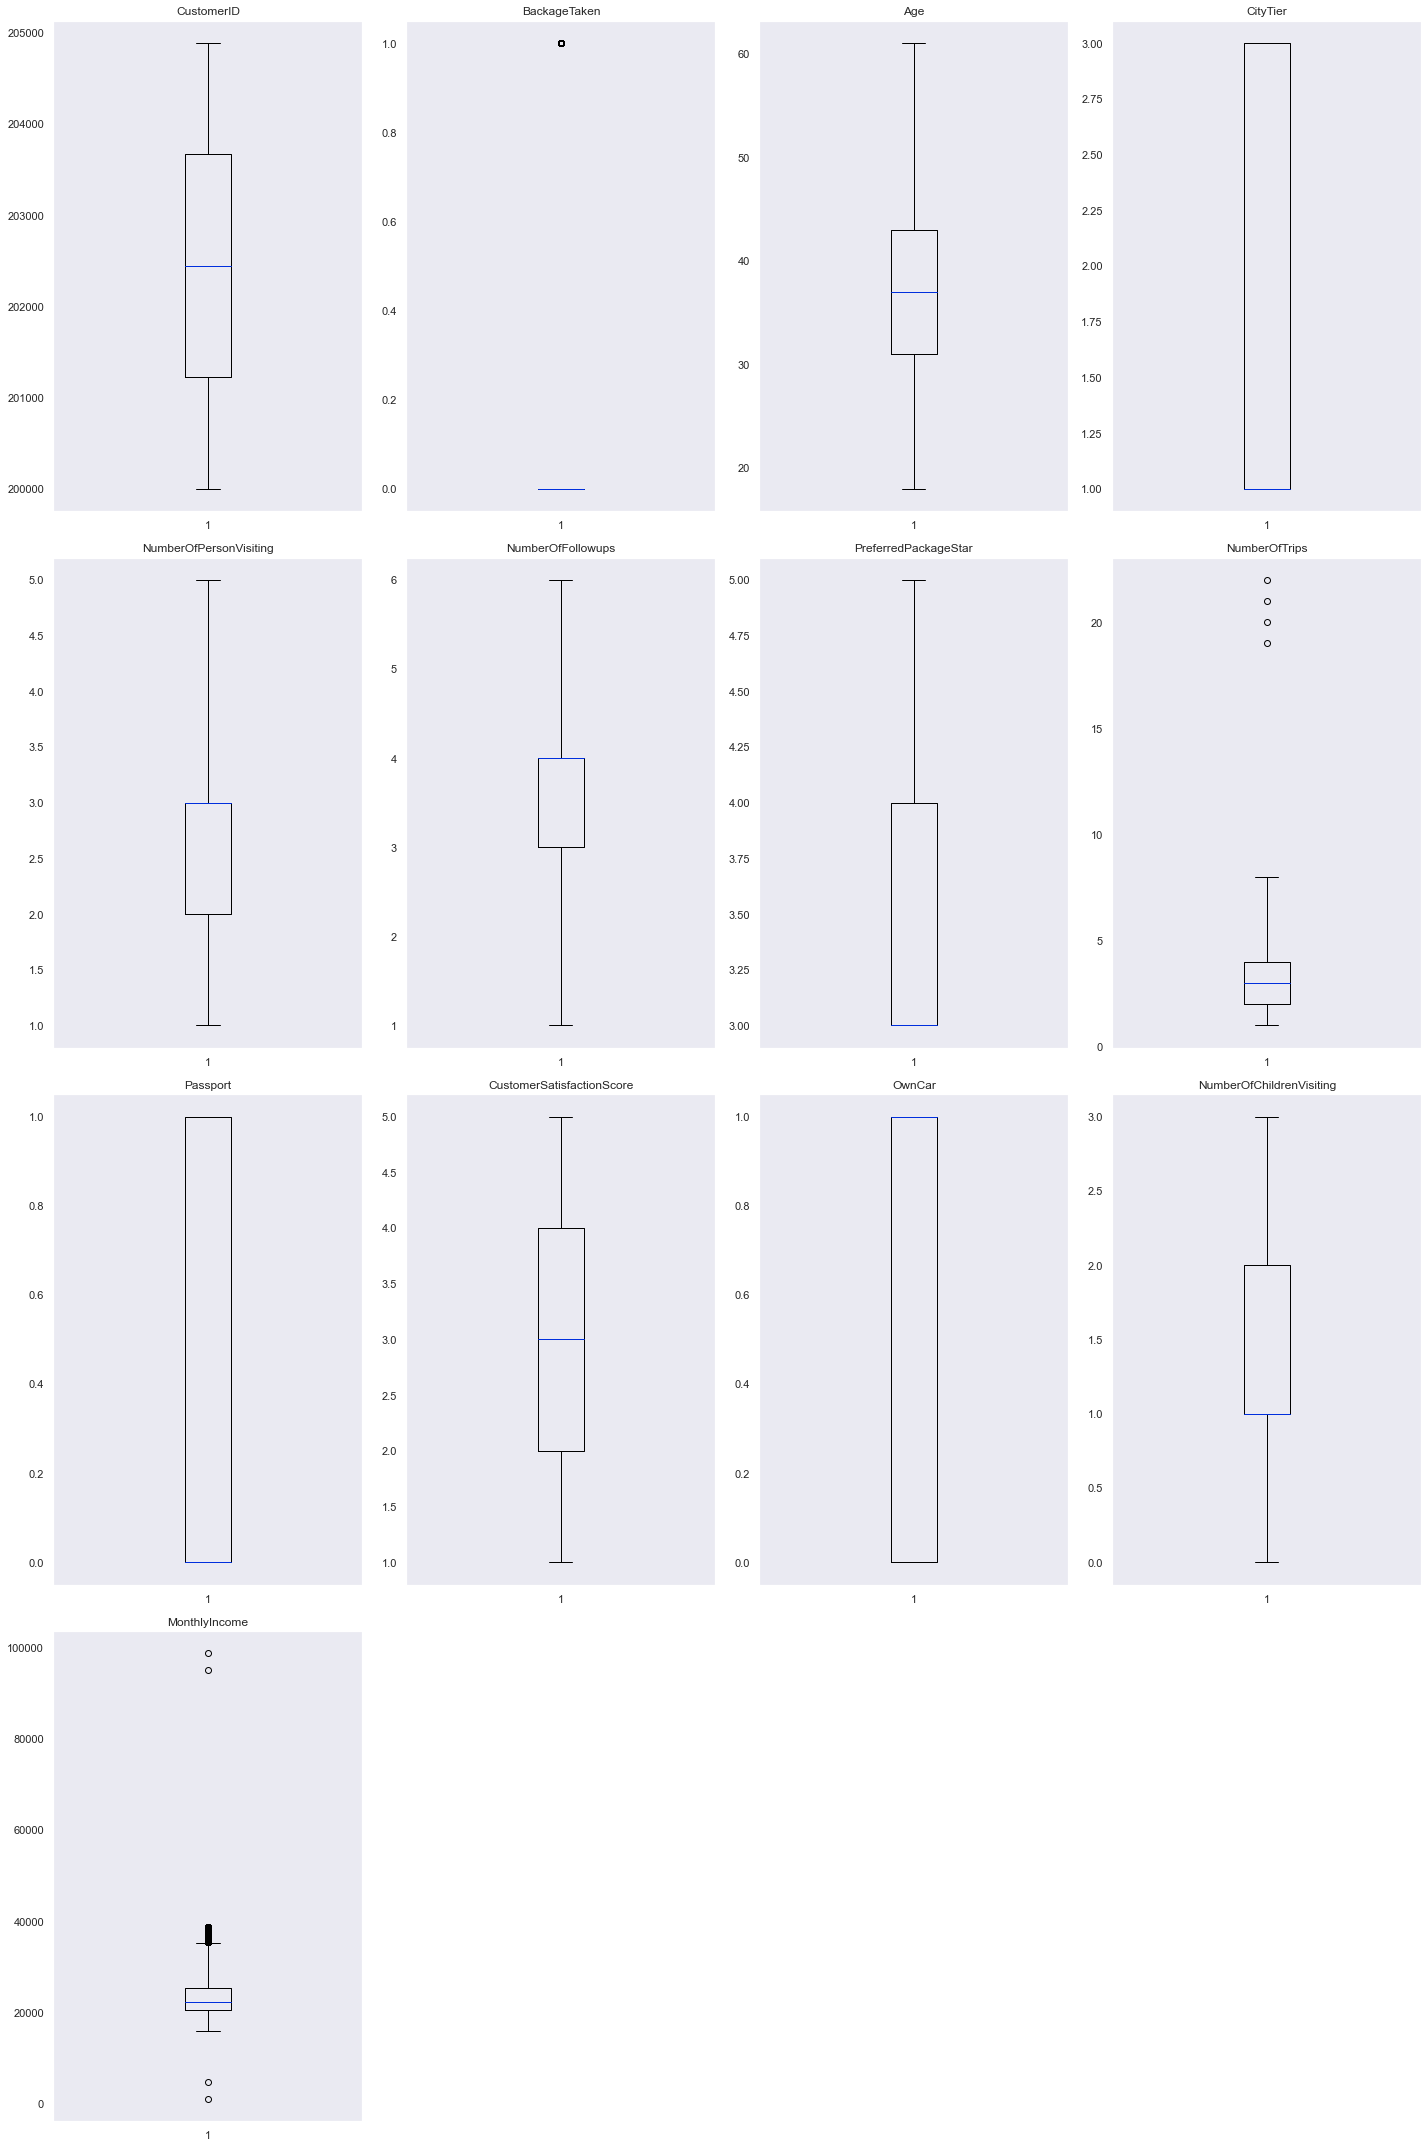

In [44]:
numeric_columns = dp.select_dtypes(include="number").columns.to_list()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(dp[variable],whis=2)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

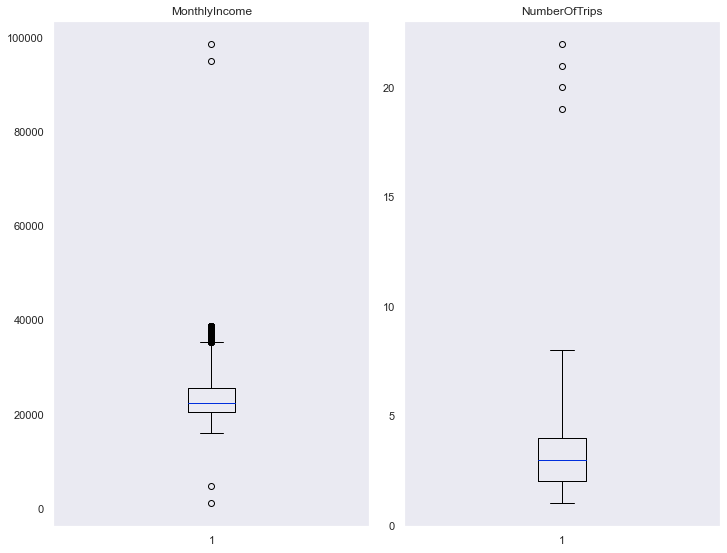

In [45]:
columns = ['MonthlyIncome','NumberOfTrips']
plt.figure(figsize=(20,30))

for i, variable in enumerate(columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(dp[variable],whis=2)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [46]:
dp.sort_values(by=["MonthlyIncome"],ascending = False).head(5)

,CustomerID,BackageTaken,Age,TypeofContact,CityTier,DurationOfDiscussion,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,CustomerSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeBin,IncomeBin
2482,202482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,...,Divorced,2.0,1,2,1,1.0,Executive,98678.0,36-45,<100000
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,...,Divorced,1.0,1,2,1,0.0,Executive,95000.0,36-45,<100000
2634,202634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,...,Divorced,2.0,0,2,1,2.0,VP,38677.0,46-55,<40000
4104,204104,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,...,Married,2.0,0,1,1,3.0,VP,38677.0,46-55,<40000
3190,203190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,...,Married,3.0,0,4,1,1.0,VP,38651.0,36-45,<40000


In [47]:
dp.sort_values(by=["MonthlyIncome"],ascending = True).head(5)

,CustomerID,BackageTaken,Age,TypeofContact,CityTier,DurationOfDiscussion,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,CustomerSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeBin,IncomeBin
142,200142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,...,Single,4.0,1,5,0,0.0,Manager,1000.0,36-45,<15000
2586,202586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,...,Single,5.0,1,5,0,1.0,Manager,4678.0,36-45,<15000
1983,201983,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,...,Single,2.0,1,5,1,1.0,Executive,16009.0,15-25,<20000
513,200513,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,...,Single,2.0,1,5,0,0.0,Executive,16009.0,15-25,<20000
2197,202197,0,18.0,Company Invited,1,11.0,Salaried,Male,3,3.0,...,Single,2.0,0,1,0,1.0,Executive,16051.0,15-25,<20000


In [48]:
dp.sort_values(by=["NumberOfTrips"],ascending = False).head(5)

,CustomerID,BackageTaken,Age,TypeofContact,CityTier,DurationOfDiscussion,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,CustomerSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeBin,IncomeBin
3260,203260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,...,Unmarried,22.0,0,2,1,1.0,Manager,25460.0,36-45,<30000
816,200816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,...,Unmarried,21.0,0,2,1,0.0,Manager,21782.0,36-45,<25000
2829,202829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,...,Single,20.0,1,4,1,2.0,Executive,20963.0,26-35,<25000
385,200385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,...,Single,19.0,1,4,1,1.0,Executive,17285.0,26-35,<20000
3155,203155,1,30.0,Self Enquiry,1,17.0,Salaried,Female,4,5.0,...,Single,8.0,1,5,1,2.0,Executive,21082.0,26-35,<25000


In [49]:
dp[(dp.MonthlyIncome>40000) | (dp.MonthlyIncome<10000)]

,CustomerID,BackageTaken,Age,TypeofContact,CityTier,DurationOfDiscussion,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,CustomerSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeBin,IncomeBin
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,...,Divorced,1.0,1,2,1,0.0,Executive,95000.0,36-45,<100000
142,200142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,...,Single,4.0,1,5,0,0.0,Manager,1000.0,36-45,<15000
2482,202482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,...,Divorced,2.0,1,2,1,1.0,Executive,98678.0,36-45,<100000
2586,202586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,...,Single,5.0,1,5,0,1.0,Manager,4678.0,36-45,<15000


In [50]:
dp[((dp["NumberOfTrips"]>8))]

,CustomerID,BackageTaken,Age,TypeofContact,CityTier,DurationOfDiscussion,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,CustomerSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeBin,IncomeBin
385,200385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,...,Single,19.0,1,4,1,1.0,Executive,17285.0,26-35,<20000
816,200816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,...,Unmarried,21.0,0,2,1,0.0,Manager,21782.0,36-45,<25000
2829,202829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,...,Single,20.0,1,4,1,2.0,Executive,20963.0,26-35,<25000
3260,203260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,...,Unmarried,22.0,0,2,1,1.0,Manager,25460.0,36-45,<30000


# Removing The Outliers

In [51]:
dp.drop(index=dp[(dp.MonthlyIncome>40000) | (dp.MonthlyIncome<12000)].index,inplace=True)

dp.drop(index=dp[dp.NumberOfTrips>10].index,inplace=True)



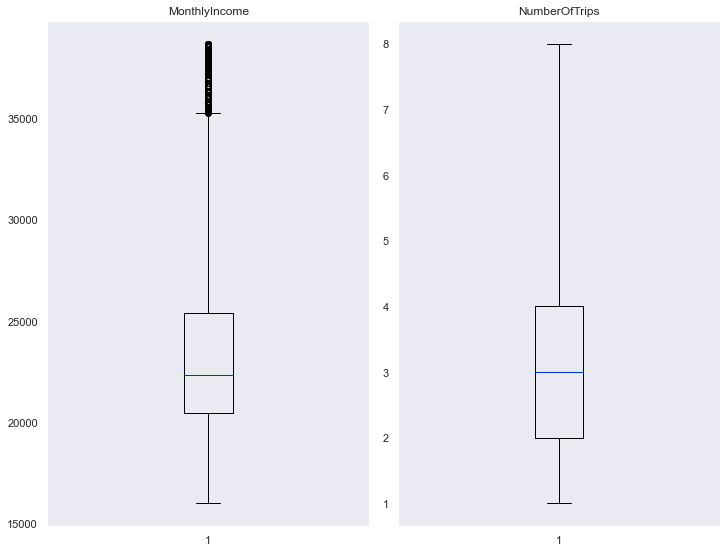

In [52]:
columns = ['MonthlyIncome','NumberOfTrips']
plt.figure(figsize=(20,30))

for i, variable in enumerate(columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(dp[variable],whis=2)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

# Total length of the dataset after outliers detection

In [53]:
len(dp)

4880

# Modelling

# Splitting in train and test data

In [54]:
X = dp.drop(['BackageTaken','CustomerSatisfactionScore','NumberOfFollowups','DurationOfDiscussion','AgeBin','IncomeBin','PackageEnquired'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = dp['BackageTaken']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

((3416, 22), (1464, 22))

In [56]:
def make_confusion_matrix(y_actual,y_predict,title):
    '''Plot confusion matrix'''
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Blues',colorbar=True,ax=ax)
    
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [57]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    if flag == True: 
          metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
          cols = ['Metric', 'Score']
          records = [(name, score) for name, score in zip(metric_names, score_list)]
          display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
          make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
          make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list # returning the list with train and test score

In [58]:
# # defining empty lists to add train and test results 
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''add score of modelto list'''
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

# DecisionTreeClassifier

In [59]:
dtree=DecisionTreeClassifier(random_state=1, class_weight={0:0.30, 1:0.70},max_depth=3)
dtree1 = dtree.fit(X_train,y_train)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.811768,0.804645,0.55521,0.570909,0.5,0.483077,0.526161,0.523333


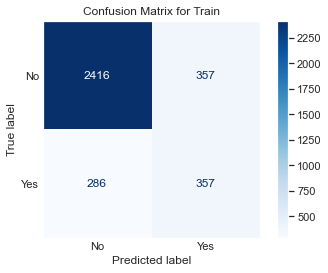

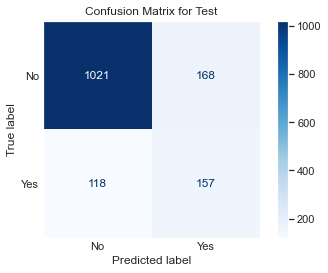

In [60]:
dtree_score=get_metrics_score(dtree,X_train,X_test,y_train,y_test)
add_score_model(dtree_score)

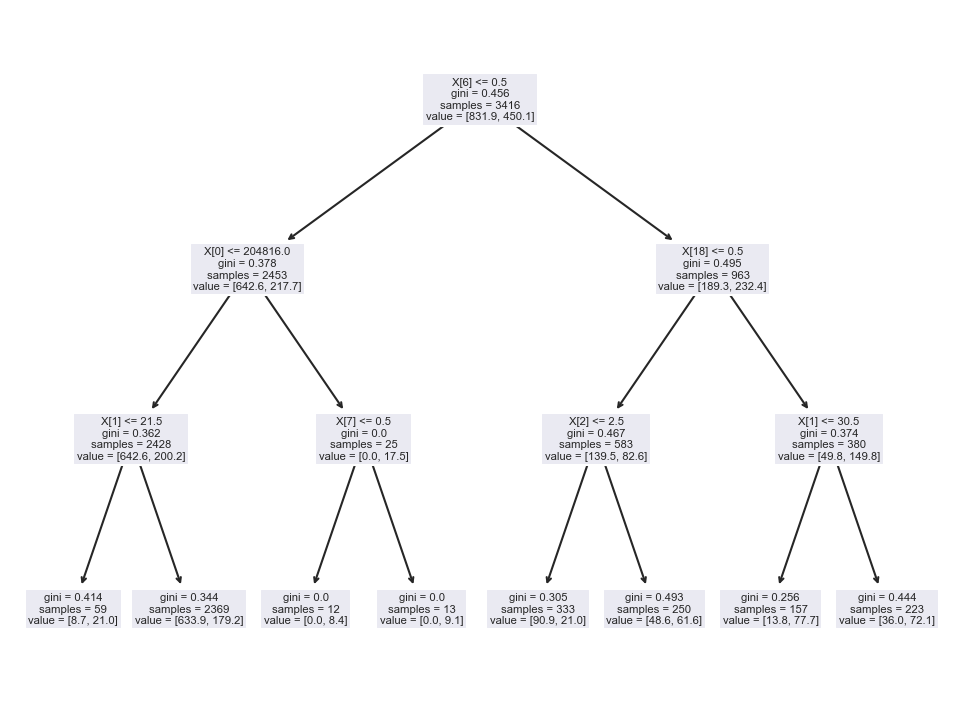

In [61]:
fig = plt.figure(figsize=(8, 6), dpi=150)
tree.plot_tree(dtree1)
plt.show()

# Observation

In [62]:
#Decision tree is overfitting the training data as there is lot of disparity between test and train.Recall score is also not that high

# BaggingClassifier

In [63]:
bagging_classifier = BaggingClassifier(random_state=1, verbose=1)
bagging_classifier.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


BaggingClassifier(random_state=1, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.989461,0.873634,0.945568,0.465455,0.998358,0.771084,0.971246,0.580499


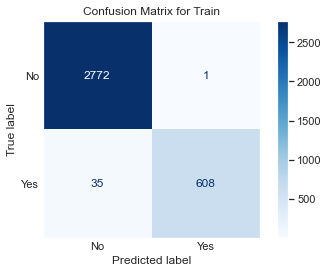

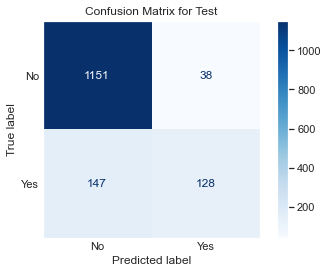

In [64]:
bagging_score=get_metrics_score(bagging_classifier,X_train,X_test,y_train,y_test)
add_score_model(bagging_score)

# Observation

In [65]:
#Bagging is still overfitting the training data , Recall score has decreased for test data

# RandomForestClassifier

In [66]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.0,0.884563,1.0,0.472727,1.0,0.844156,1.0,0.606061


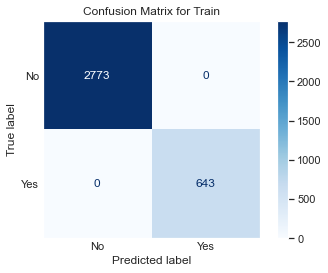

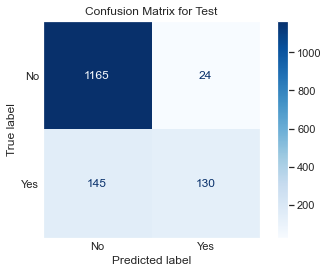

In [67]:
score_list_rf=get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)
add_score_model(score_list_rf)

# Observation

In [68]:
#Random forest is also overfitting the traning data

# Support vector machines

In [69]:
svm = SVC(random_state=1)
svm.fit(X_train,y_train)

SVC(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.811768,0.812158,0.0,0.0,0.0,0.0,0.0,0.0


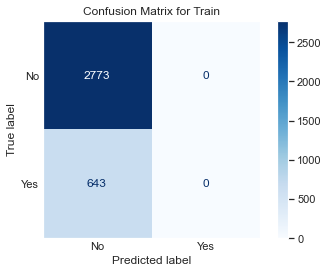

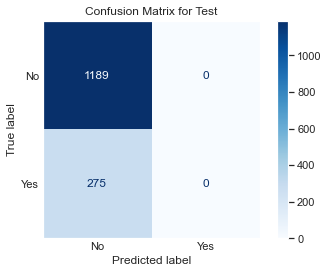

In [70]:
score_list_rf=get_metrics_score(svm,X_train,X_test,y_train,y_test)
add_score_model(score_list_rf)

In [71]:
#SVM is not suitable as all the scores are 0, the classifier cannot predict any correct positive result.

In [72]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          'Support Vector Machine',
                                          
                                          ], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,
                                          'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,
                                          'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision Tree,0.811768,0.804645,0.555210,0.570909,0.500000,0.483077,0.526161,0.523333
2,Random Forest,1.000000,0.884563,1.000000,0.472727,1.000000,0.844156,1.000000,0.606061
1,Bagging Classifier,0.989461,0.873634,0.945568,0.465455,0.998358,0.771084,0.971246,0.580499
3,Support Vector Machine,0.811768,0.812158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 

In [73]:
X

,CustomerID,Age,CityTier,NumberOfPersonVisiting,PreferredPackageStar,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,...,Occupation_Salaried,Occupation_Small Business,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,41.000000,3,3,3.0,1.0,1,1,0.0,20993.0,...,1,0,0,0,1,0,0,1,0,0
1,200001,49.000000,1,3,4.0,2.0,0,1,2.0,20130.0,...,1,0,1,0,0,0,0,1,0,0
2,200002,37.000000,1,3,3.0,7.0,1,0,0.0,17090.0,...,0,0,1,0,1,0,1,0,0,0
3,200003,33.000000,1,2,3.0,2.0,1,1,1.0,17909.0,...,1,0,0,0,0,0,1,0,0,0
4,200004,37.622265,1,2,4.0,1.0,0,1,0.0,18468.0,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,49.000000,3,3,4.0,2.0,1,1,1.0,26576.0,...,0,1,1,0,0,1,0,1,0,0
4884,204884,28.000000,1,4,3.0,3.0,1,1,2.0,21212.0,...,1,0,1,0,1,0,1,0,0,0
4885,204885,52.000000,3,4,4.0,7.0,0,1,3.0,31820.0,...,1,0,0,1,0,0,0,0,1,0
4886,204886,19.000000,3,3,3.0,3.0,0,0,2.0,20289.0,...,0,1,1,0,1,0,1,0,0,0


# Tuning Decision Tree

In [74]:
#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': [1,4,7,15], 
              'min_samples_leaf': [2,3,5],
              'max_leaf_nodes' : [ 5,7,10,15]
              
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=7,
                       max_leaf_nodes=15, min_samples_leaf=2, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.788056,0.760246,0.690513,0.68,0.458204,0.415556,0.550868,0.515862


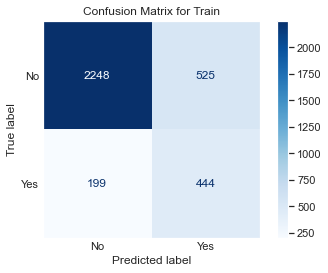

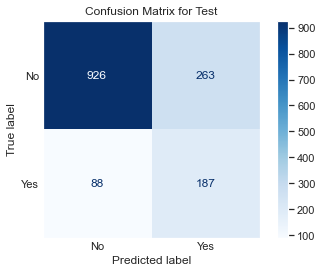

In [75]:
score_tune_dt=get_metrics_score(dtree_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_dt) # add score to dataframe

# Tuning Random Forest

In [76]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.20,1:0.80},random_state=1)

parameters = { "max_depth":[5,9,15],
               "n_estimators": [150,200,250,500],
               "min_samples_leaf": np.arange(5, 10),
                "max_features": ['auto'],
                "max_samples": np.arange(0.3,0.5, 0.7)
              }
# parameters = {"n_estimators": [50,80,150], 
#               "max_depth": [1,2,3], 
#               "min_samples_split": [3,4,6,7],"max_features": ['auto'],
#              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       max_samples=0.3, min_samples_leaf=9, n_estimators=250,
                       random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.837237,0.813525,0.623639,0.621818,0.560839,0.502941,0.590574,0.556098


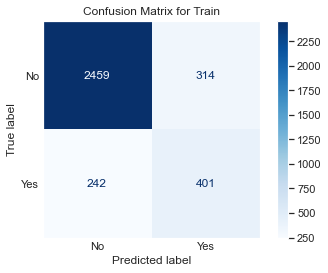

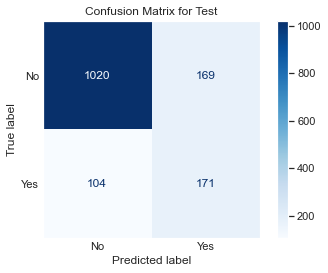

In [77]:
score_tune_rt=get_metrics_score(rf_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_rt) 

# Tuning Bagging Classifier

In [78]:
# Choose the type of classifier. 

bagging_estimator_tuned = BaggingClassifier(DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        random_state=1),
                  max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.999122,0.875683,0.995334,0.432727,1.0,0.82069,0.997662,0.566667


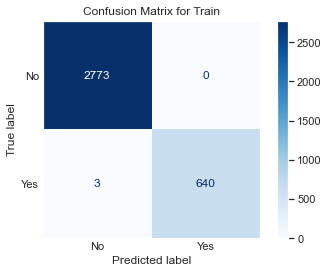

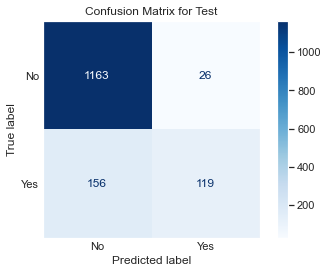

In [79]:
bagging_tuned=get_metrics_score(bagging_estimator_tuned,X_train,X_test,y_train,y_test)
add_score_model(bagging_tuned)

In [80]:
#As test_recall has decreased it does not overcome the problem of overfitting

# Model Building Boosting

# Adaboost

In [81]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.861534,0.856557,0.363919,0.374545,0.785235,0.730496,0.497343,0.495192


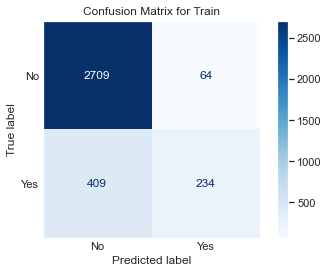

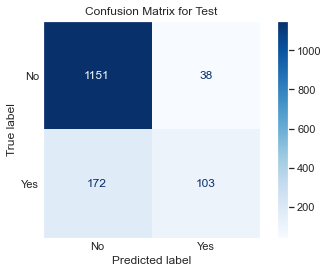

In [82]:
adaboost_score=get_metrics_score(adaboost,X_train,X_test,y_train,y_test)
add_score_model(adaboost_score)

# Gradient Boost

In [83]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.885539,0.876366,0.463453,0.447273,0.866279,0.809211,0.60385,0.576112


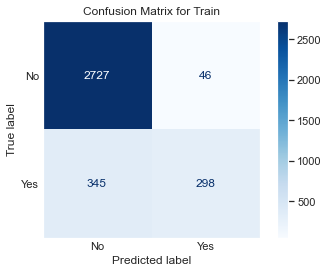

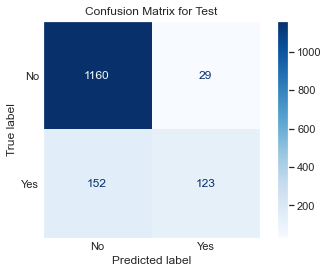

In [84]:
gbc_score=get_metrics_score(gbc,X_train,X_test,y_train,y_test)
add_score_model(gbc_score)

# XGBoost

In [85]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.994438,0.887978,0.970451,0.552727,1.0,0.787565,0.985004,0.649573


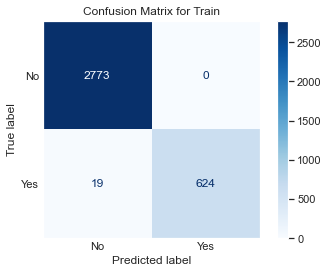

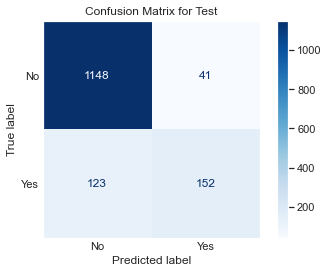

In [86]:
xgb_score=get_metrics_score(xgb,X_train,X_test,y_train,y_test)
add_score_model(xgb_score)

In [87]:
#XGBoost is overfitting as training accuracy is very high

In [90]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          'Support Vector Machine',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier',
                                          'AdaBoost',
                                          'Gradient Boost',
                                          'XGboost',
                                          ], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,
                                          'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,
                                          'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
4,Tuned Decision Tree,0.788056,0.760246,0.690513,0.680000,0.458204,0.415556,0.550868,0.515862
5,Tuned Random Forest,0.837237,0.813525,0.623639,0.621818,0.560839,0.502941,0.590574,0.556098
0,Decision Tree,0.811768,0.804645,0.555210,0.570909,0.500000,0.483077,0.526161,0.523333
9,XGboost,0.994438,0.887978,0.970451,0.552727,1.000000,0.787565,0.985004,0.649573
2,Random Forest,1.000000,0.884563,1.000000,0.472727,1.000000,0.844156,1.000000,0.606061
1,Bagging Classifier,0.989461,0.873634,0.945568,0.465455,0.998358,0.771084,0.971246,0.580499
8,Gradient Boost,0.885539,0.876366,0.463453,0.447273,0.866279,0.809211,0.603850,0.576112
6,Tuned Bagging Classifier,0.999122,0.875683,0.995334,0.432727,1.000000,0.820690,0.997662,0.566667
7,AdaBoost,0.861534,0.856557,0.363919,0.374545,0.785235,0.730496,0.497343,0.495192
3,Support Vector Machine,0.811768,0.812158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [89]:
#From this we can say Gradient Boost is more suitable technique
#Decision Tree classifier gives more generalized model